In [1]:
#!pip install catboost

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import model_selection


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_url = "분류코드추가_잡코리아취업데이터(전처리).csv"
data_pd = pd.read_csv(data_url, encoding='cp949')

In [5]:
data_pd

,회사명,분류코드,기업분류,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사
0,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.00,945,없음,IH,4,0,1,0,1,2
1,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.53,0,없음,IH,0,2,0,0,1,6
2,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.83,945,없음,IM1,0,3,0,3,0,2
3,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.06,980,AM,없음,0,3,1,0,0,0
4,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.29,0,Lv6,없음,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.35,815,Lv6,없음,0,0,0,0,0,0
896,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.62,985,없음,AL,0,3,2,1,1,7
897,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,4.31,970,Lv7,없음,1,3,2,0,2,3
898,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.50,800,Lv6,없음,0,0,0,0,0,0


In [6]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     900 non-null    object 
 1   분류코드    900 non-null    int64  
 2   기업분류    899 non-null    object 
 3   시기      900 non-null    object 
 4   지원분야    900 non-null    object 
 5   대학      900 non-null    object 
 6   계열      900 non-null    object 
 7   전공      900 non-null    object 
 8   학점      900 non-null    float64
 9   토익      900 non-null    int64  
 10  토익스피킹   900 non-null    object 
 11  오픽      900 non-null    object 
 12  외국어     900 non-null    int64  
 13  자격증     900 non-null    int64  
 14  해외경험    900 non-null    int64  
 15  인턴      900 non-null    int64  
 16  수상내역    900 non-null    int64  
 17  봉사      900 non-null    int64  
dtypes: float64(1), int64(8), object(9)
memory usage: 126.7+ KB


In [7]:
data_pd.describe()

,분류코드,학점,토익,외국어,자격증,해외경험,인턴,수상내역,봉사
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.244444,3.322656,493.064444,0.143333,1.840000,0.442222,0.675556,0.391111,1.231111
std,0.602389,1.209054,443.059778,0.457918,2.616572,0.983736,1.923238,0.678880,2.101943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.700000,790.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.930000,901.250000,0.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,3.000000,4.500000,990.000000,4.000000,16.000000,14.000000,11.000000,4.000000,16.000000


In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # 객체 생성   sparse=False :array  sparse=True:Matrix 
#data_pd['시기_onehot'] = ohe.fit_transform(data_pd['시기'].values.reshape(-1, 1))

encoded_columns = ohe.fit_transform(data_pd[['시기']])
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['시기']))

data_pd = pd.concat([data_pd, encoded_df], axis=1)
data_pd

,회사명,분류코드,기업분류,시기,지원분야,대학,계열,전공,학점,토익,...,시기_2014-01-01,시기_2015-01-01,시기_2016-01-01,시기_2017-01-01,시기_2018-01-01,시기_2019-01-01,시기_2020-01-01,시기_2021-01-01,시기_2022-01-01,시기_2023-01-01
0,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.00,945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.83,945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.06,980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.35,815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
896,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.62,985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
897,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,4.31,970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
898,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.50,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# 데이터 전처리

#범주형데이터 encoding
label_encoder = LabelEncoder()
data_pd['시기_encoded'] = label_encoder.fit_transform(data_pd['시기'])
data_pd['전공_encoded'] = label_encoder.fit_transform(data_pd['전공'])
data_pd['계열_encoded'] = label_encoder.fit_transform(data_pd['계열'])
data_pd['토익스피킹_encoded'] = label_encoder.fit_transform(data_pd['토익스피킹'])
data_pd['오픽_encoded'] = label_encoder.fit_transform(data_pd['오픽'])

X = data_pd[['토익','시기_encoded','전공_encoded', '계열_encoded','토익스피킹_encoded', '오픽_encoded', '자격증', '해외경험', '인턴']]
y = data_pd[['분류코드']] 

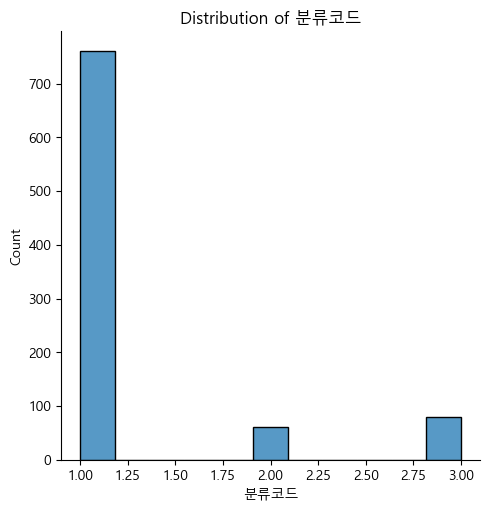

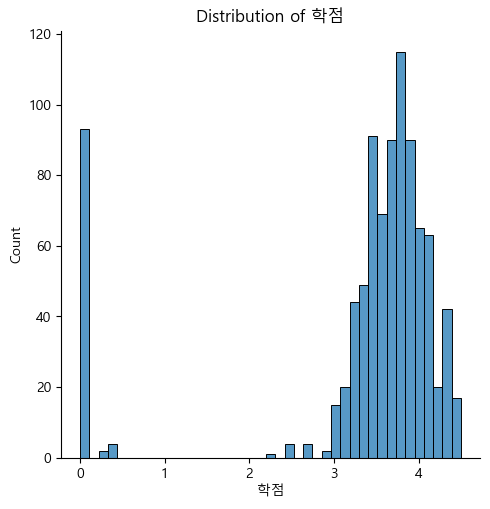

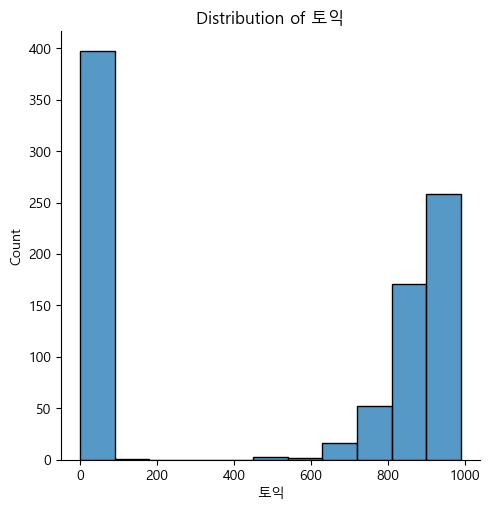

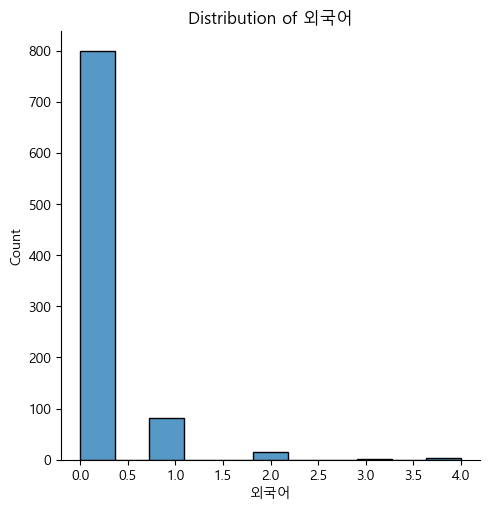

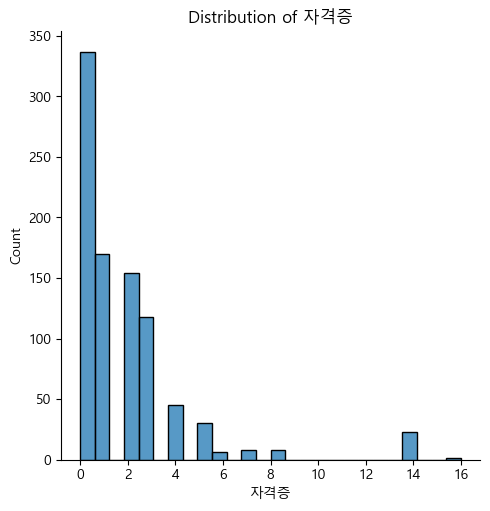

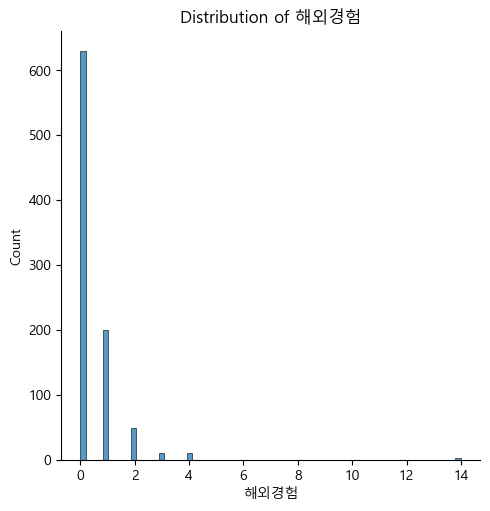

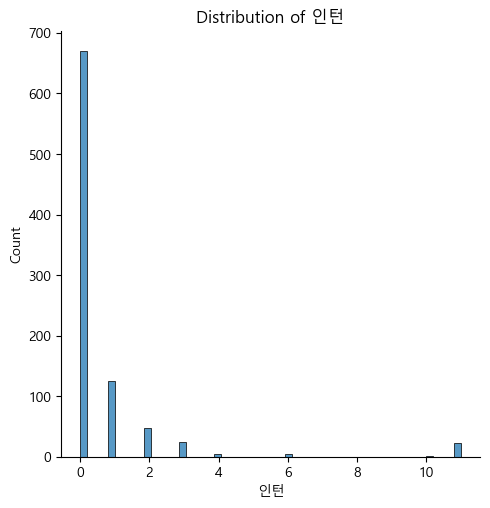

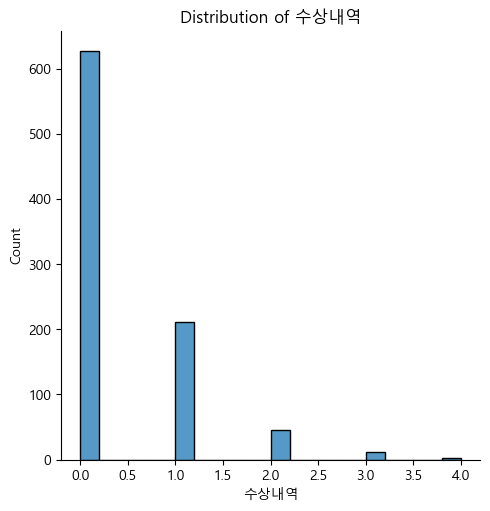

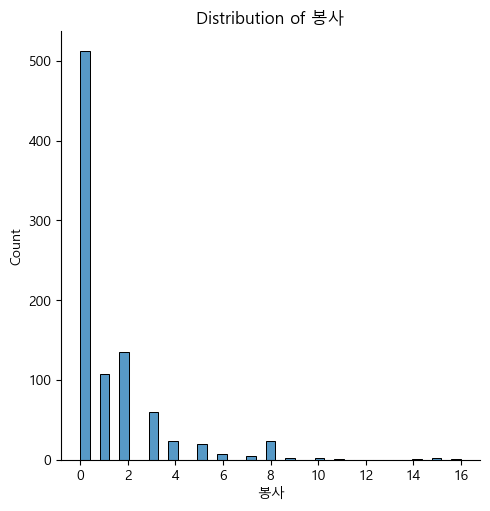

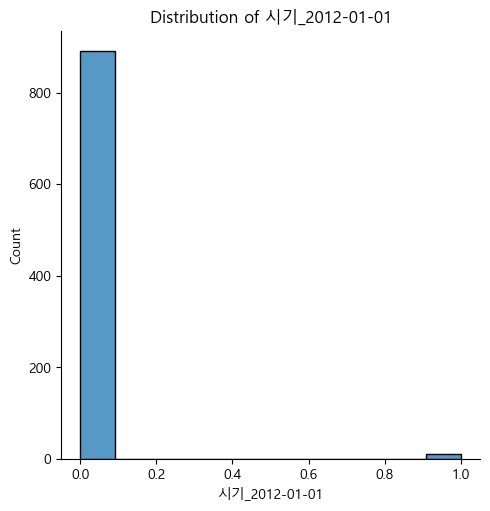

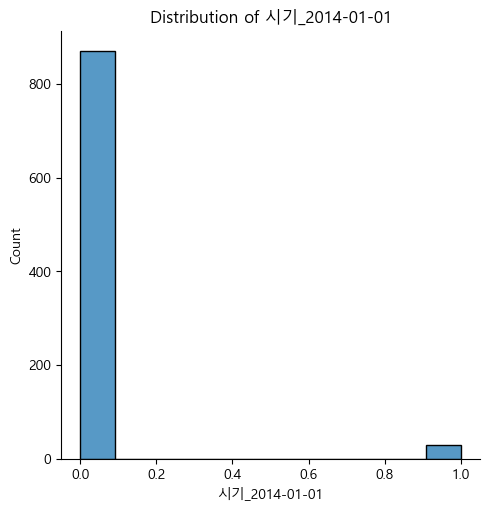

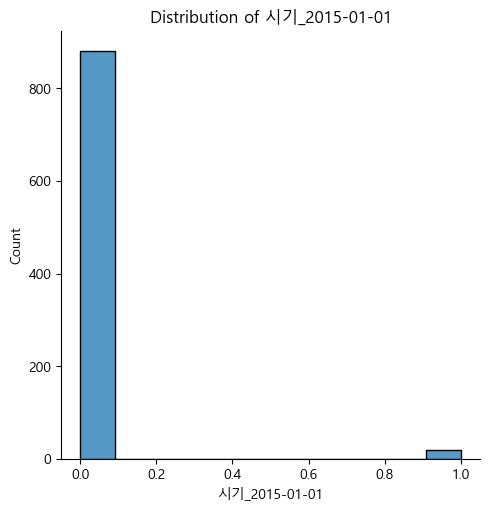

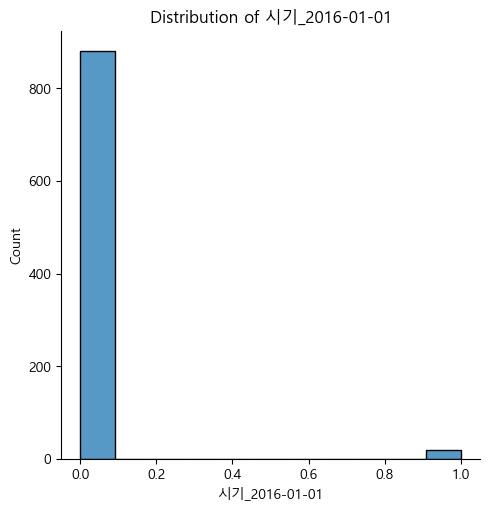

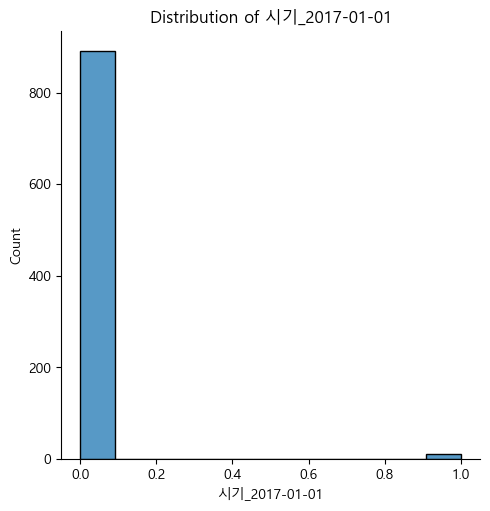

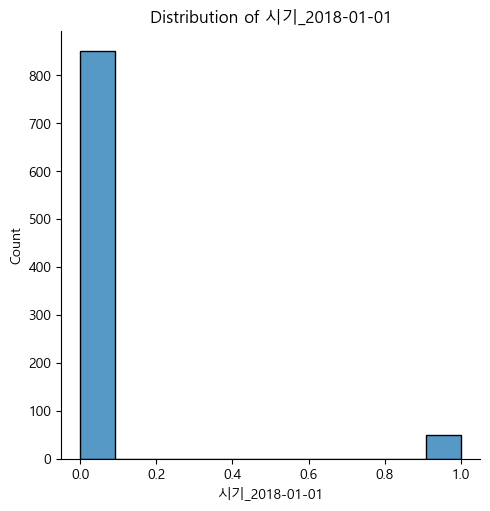

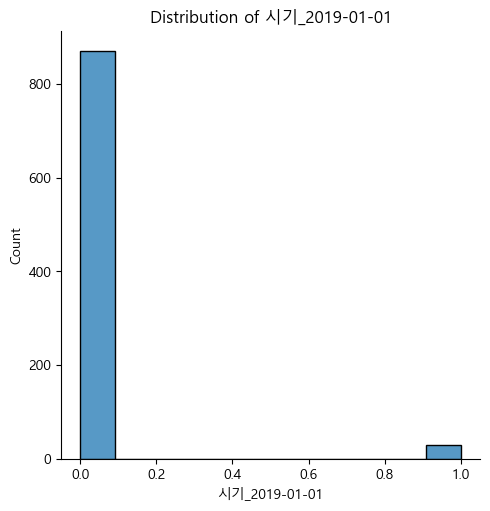

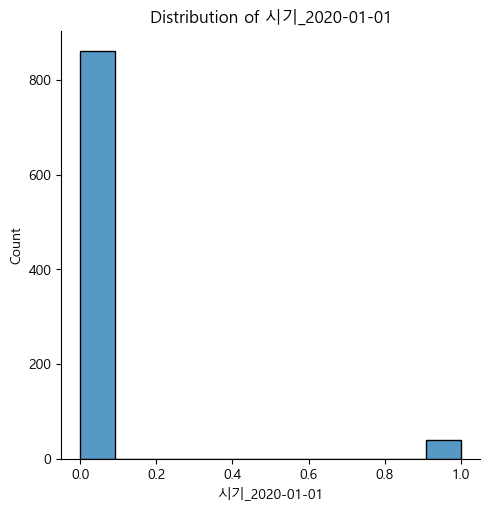

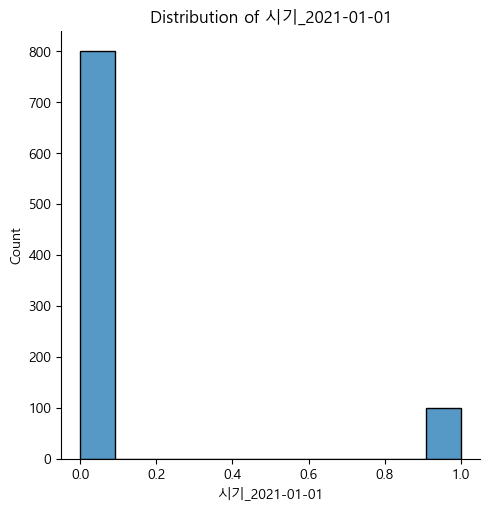

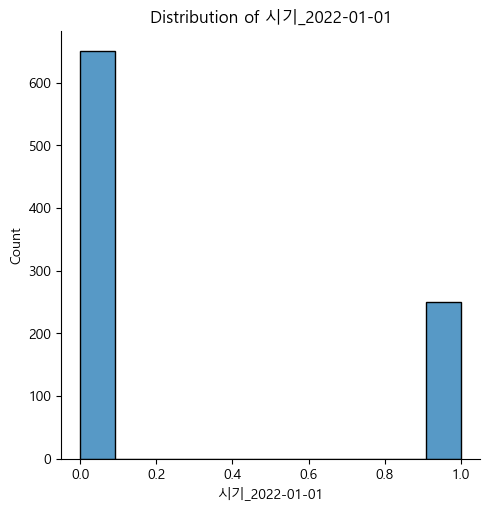

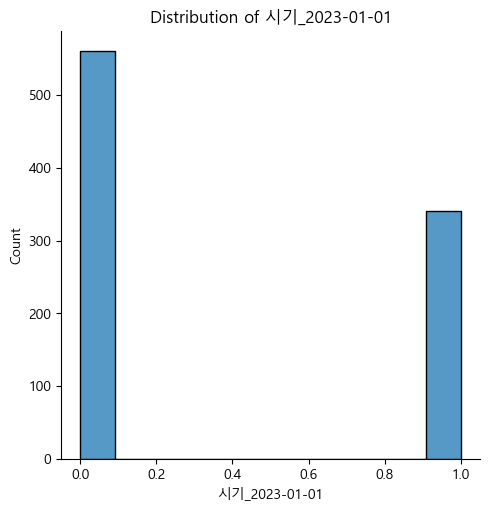

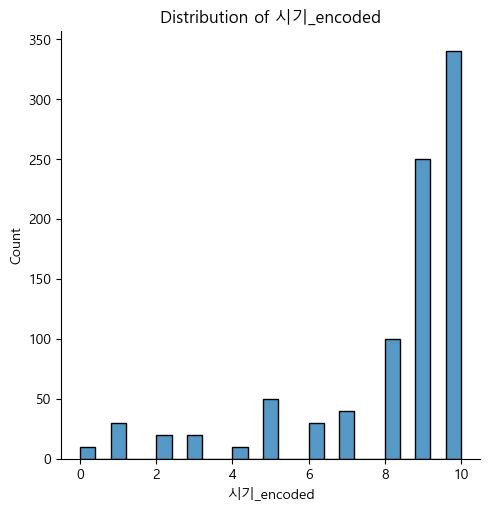

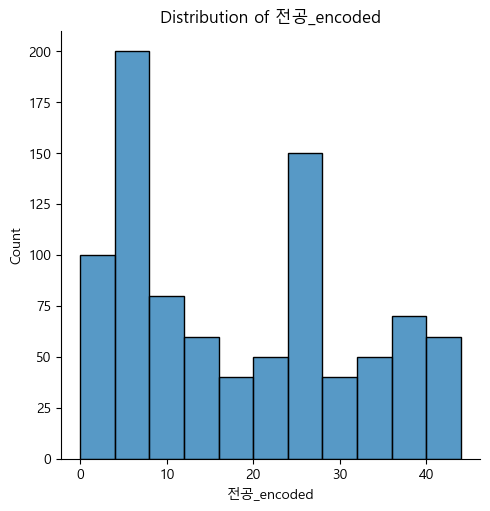

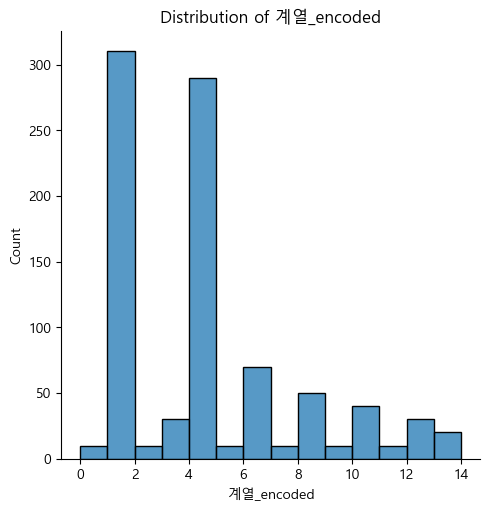

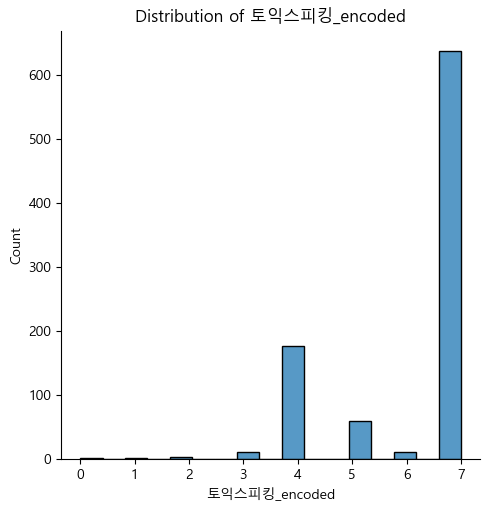

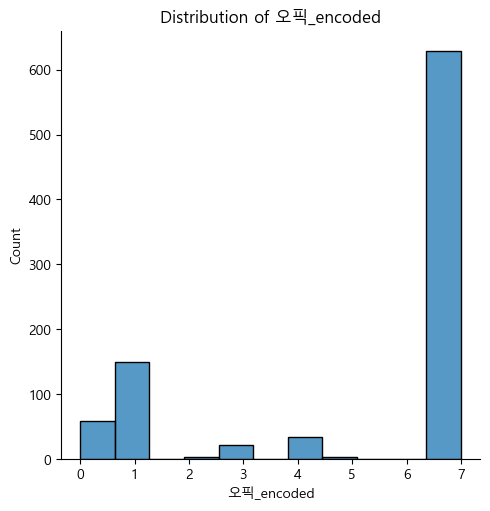

In [10]:
for column in data_pd.columns:
    if data_pd[column].dtype != 'object':
        sns.displot(data_pd[column])
        plt.title(f'Distribution of {column}')
        plt.show()

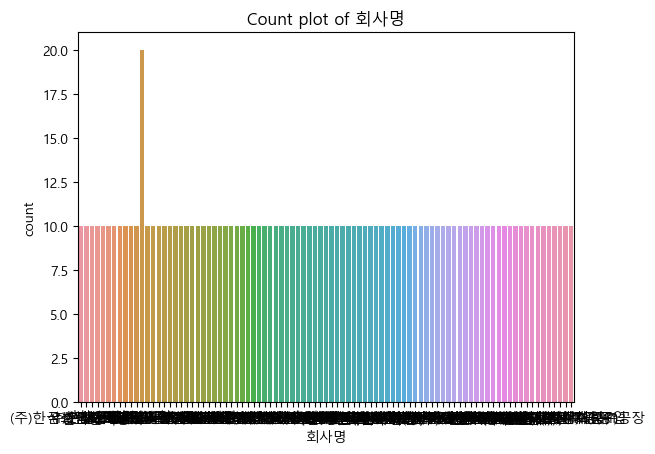

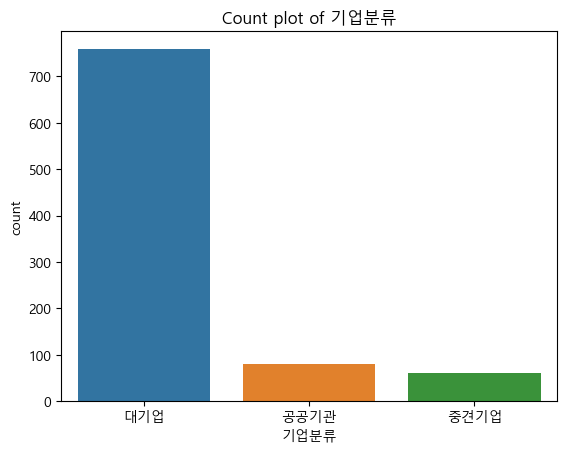

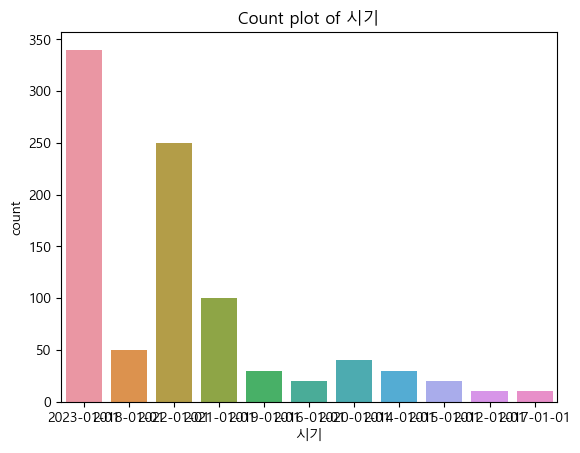

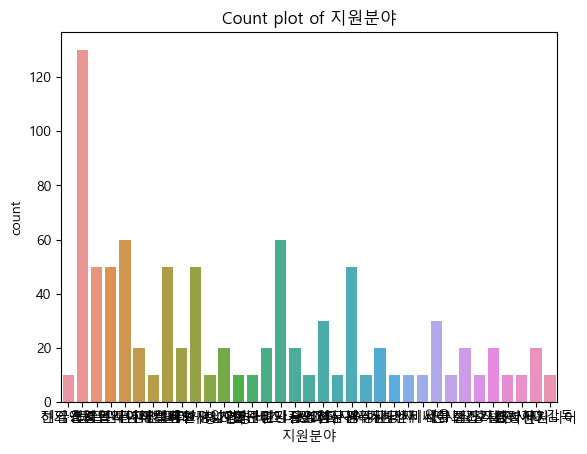

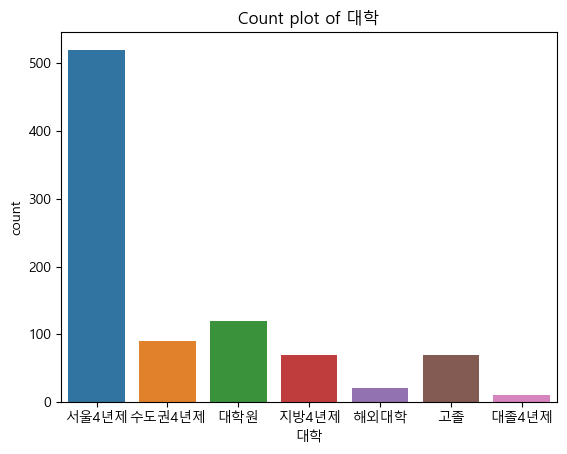

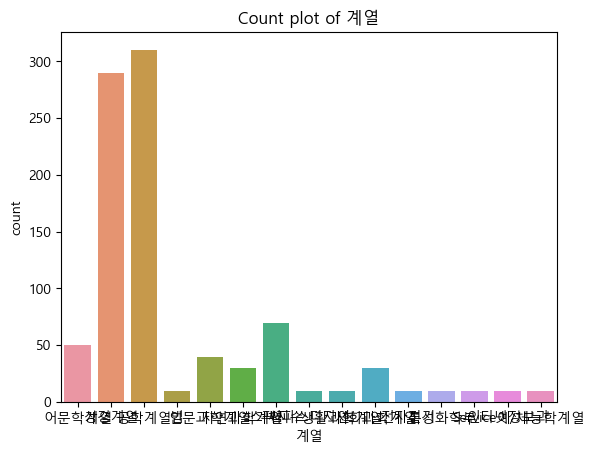

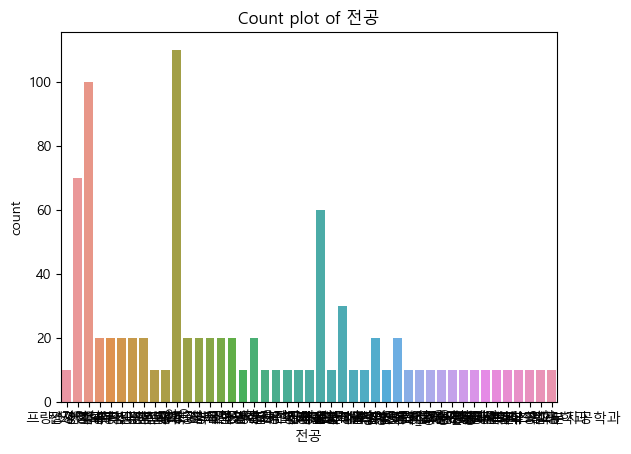

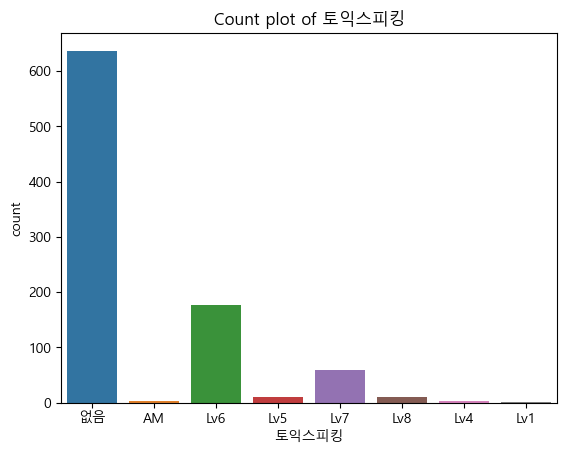

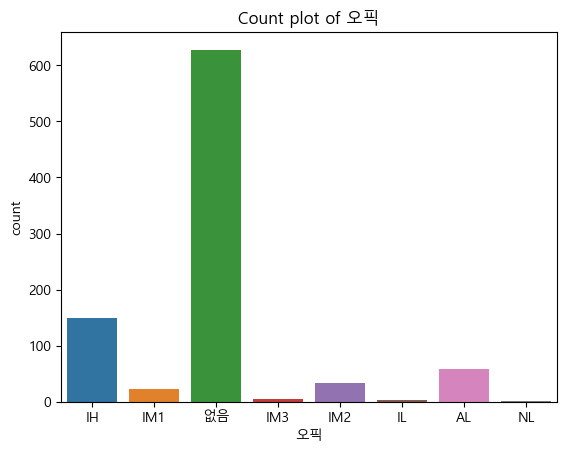

In [11]:
# 범주형 변수의 카운트 플롯
categorical_columns = data_pd.select_dtypes(include='object').columns
for column in categorical_columns:
    sns.countplot(x=column, data=data_pd)
    plt.title(f'Count plot of {column}')
    plt.show()

<Axes: >

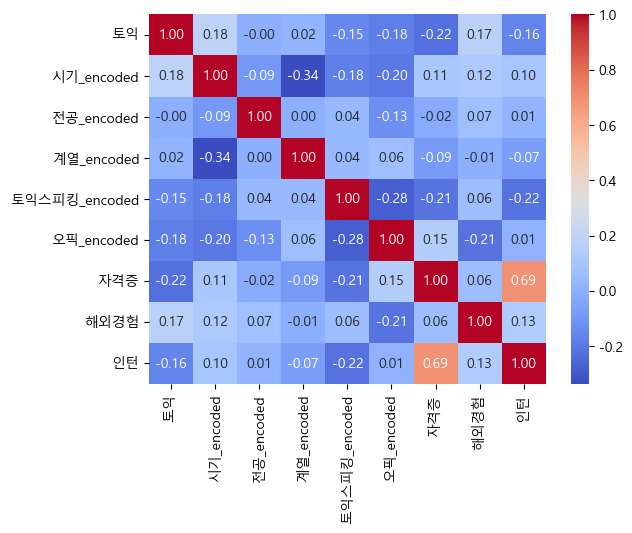

In [12]:
correlation_matrix = X.corr()

# Heatmap으로 상관 관계 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [13]:
#8.CatBoost
kfold = model_selection.KFold(n_splits = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = {}


ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(ctb_clf, X_test, y_test, cv = 9)
scores[('8.CatBoost', 'train_score')] = results.mean()
scores[('8.CatBoost', 'test_score')] = ctb_clf.score(X_test, y_test)

pd.Series(scores).unstack()

Learning rate set to 0.077812
0:	learn: 1.0255046	total: 143ms	remaining: 2m 22s
1:	learn: 0.9561898	total: 144ms	remaining: 1m 12s
2:	learn: 0.8953015	total: 146ms	remaining: 48.4s
3:	learn: 0.8405020	total: 148ms	remaining: 36.8s
4:	learn: 0.7975728	total: 150ms	remaining: 29.8s
5:	learn: 0.7579636	total: 152ms	remaining: 25.2s
6:	learn: 0.7257535	total: 155ms	remaining: 22s
7:	learn: 0.6946799	total: 157ms	remaining: 19.5s
8:	learn: 0.6684517	total: 159ms	remaining: 17.5s
9:	learn: 0.6430492	total: 161ms	remaining: 16s
10:	learn: 0.6222322	total: 163ms	remaining: 14.7s
11:	learn: 0.6053820	total: 165ms	remaining: 13.6s
12:	learn: 0.5873600	total: 168ms	remaining: 12.7s
13:	learn: 0.5710266	total: 170ms	remaining: 12s
14:	learn: 0.5514130	total: 172ms	remaining: 11.3s
15:	learn: 0.5362142	total: 174ms	remaining: 10.7s
16:	learn: 0.5194788	total: 176ms	remaining: 10.2s
17:	learn: 0.5057043	total: 177ms	remaining: 9.65s
18:	learn: 0.4935672	total: 178ms	remaining: 9.18s
19:	learn: 0.48

246:	learn: 0.0861867	total: 379ms	remaining: 1.16s
247:	learn: 0.0857017	total: 380ms	remaining: 1.15s
248:	learn: 0.0853153	total: 382ms	remaining: 1.15s
249:	learn: 0.0849471	total: 383ms	remaining: 1.15s
250:	learn: 0.0847196	total: 384ms	remaining: 1.14s
251:	learn: 0.0845114	total: 384ms	remaining: 1.14s
252:	learn: 0.0843443	total: 385ms	remaining: 1.14s
253:	learn: 0.0839723	total: 386ms	remaining: 1.13s
254:	learn: 0.0835374	total: 387ms	remaining: 1.13s
255:	learn: 0.0832627	total: 388ms	remaining: 1.13s
256:	learn: 0.0830687	total: 389ms	remaining: 1.12s
257:	learn: 0.0824970	total: 390ms	remaining: 1.12s
258:	learn: 0.0822401	total: 391ms	remaining: 1.12s
259:	learn: 0.0820042	total: 391ms	remaining: 1.11s
260:	learn: 0.0815696	total: 392ms	remaining: 1.11s
261:	learn: 0.0812427	total: 393ms	remaining: 1.11s
262:	learn: 0.0810116	total: 394ms	remaining: 1.1s
263:	learn: 0.0806981	total: 395ms	remaining: 1.1s
264:	learn: 0.0805070	total: 396ms	remaining: 1.1s
265:	learn: 0.0

443:	learn: 0.0536959	total: 563ms	remaining: 705ms
444:	learn: 0.0535979	total: 564ms	remaining: 703ms
445:	learn: 0.0535348	total: 565ms	remaining: 701ms
446:	learn: 0.0534955	total: 566ms	remaining: 700ms
447:	learn: 0.0534574	total: 566ms	remaining: 698ms
448:	learn: 0.0533390	total: 567ms	remaining: 696ms
449:	learn: 0.0532767	total: 568ms	remaining: 694ms
450:	learn: 0.0532064	total: 569ms	remaining: 693ms
451:	learn: 0.0531010	total: 571ms	remaining: 692ms
452:	learn: 0.0530621	total: 572ms	remaining: 690ms
453:	learn: 0.0529261	total: 573ms	remaining: 689ms
454:	learn: 0.0527972	total: 574ms	remaining: 687ms
455:	learn: 0.0526761	total: 575ms	remaining: 686ms
456:	learn: 0.0526136	total: 576ms	remaining: 684ms
457:	learn: 0.0525344	total: 577ms	remaining: 682ms
458:	learn: 0.0524437	total: 578ms	remaining: 681ms
459:	learn: 0.0523716	total: 579ms	remaining: 679ms
460:	learn: 0.0522159	total: 579ms	remaining: 677ms
461:	learn: 0.0521436	total: 580ms	remaining: 676ms
462:	learn: 

645:	learn: 0.0406256	total: 745ms	remaining: 409ms
646:	learn: 0.0405653	total: 746ms	remaining: 407ms
647:	learn: 0.0405372	total: 748ms	remaining: 406ms
648:	learn: 0.0404912	total: 748ms	remaining: 405ms
649:	learn: 0.0404752	total: 749ms	remaining: 403ms
650:	learn: 0.0404312	total: 750ms	remaining: 402ms
651:	learn: 0.0403800	total: 751ms	remaining: 401ms
652:	learn: 0.0403528	total: 752ms	remaining: 400ms
653:	learn: 0.0403288	total: 753ms	remaining: 398ms
654:	learn: 0.0403011	total: 754ms	remaining: 397ms
655:	learn: 0.0402573	total: 755ms	remaining: 396ms
656:	learn: 0.0402183	total: 756ms	remaining: 395ms
657:	learn: 0.0401386	total: 757ms	remaining: 393ms
658:	learn: 0.0400463	total: 758ms	remaining: 392ms
659:	learn: 0.0400245	total: 758ms	remaining: 391ms
660:	learn: 0.0399755	total: 759ms	remaining: 389ms
661:	learn: 0.0399500	total: 760ms	remaining: 388ms
662:	learn: 0.0399077	total: 761ms	remaining: 387ms
663:	learn: 0.0398727	total: 762ms	remaining: 386ms
664:	learn: 

841:	learn: 0.0339720	total: 925ms	remaining: 174ms
842:	learn: 0.0339628	total: 926ms	remaining: 173ms
843:	learn: 0.0339452	total: 928ms	remaining: 172ms
844:	learn: 0.0339366	total: 929ms	remaining: 170ms
845:	learn: 0.0339241	total: 930ms	remaining: 169ms
846:	learn: 0.0339192	total: 931ms	remaining: 168ms
847:	learn: 0.0338967	total: 932ms	remaining: 167ms
848:	learn: 0.0338863	total: 933ms	remaining: 166ms
849:	learn: 0.0338465	total: 933ms	remaining: 165ms
850:	learn: 0.0338222	total: 934ms	remaining: 164ms
851:	learn: 0.0338129	total: 936ms	remaining: 163ms
852:	learn: 0.0337992	total: 936ms	remaining: 161ms
853:	learn: 0.0337762	total: 937ms	remaining: 160ms
854:	learn: 0.0337680	total: 938ms	remaining: 159ms
855:	learn: 0.0337554	total: 939ms	remaining: 158ms
856:	learn: 0.0337433	total: 940ms	remaining: 157ms
857:	learn: 0.0337247	total: 941ms	remaining: 156ms
858:	learn: 0.0337030	total: 942ms	remaining: 155ms
859:	learn: 0.0336690	total: 943ms	remaining: 153ms
860:	learn: 

Learning rate set to 0.072066
0:	learn: 1.0468799	total: 1.09ms	remaining: 1.09s
1:	learn: 0.9799960	total: 1.62ms	remaining: 809ms
2:	learn: 0.9191917	total: 1.92ms	remaining: 637ms
3:	learn: 0.8710560	total: 2.42ms	remaining: 604ms
4:	learn: 0.8259678	total: 3.12ms	remaining: 620ms
5:	learn: 0.7973699	total: 3.81ms	remaining: 631ms
6:	learn: 0.7636079	total: 4.45ms	remaining: 632ms
7:	learn: 0.7345203	total: 5.19ms	remaining: 644ms
8:	learn: 0.7037201	total: 5.81ms	remaining: 640ms
9:	learn: 0.6851247	total: 6.55ms	remaining: 648ms
10:	learn: 0.6616365	total: 7.55ms	remaining: 678ms
11:	learn: 0.6411816	total: 8.29ms	remaining: 683ms
12:	learn: 0.6214160	total: 8.92ms	remaining: 678ms
13:	learn: 0.6019973	total: 9.62ms	remaining: 677ms
14:	learn: 0.5879614	total: 10.3ms	remaining: 677ms
15:	learn: 0.5755359	total: 11.6ms	remaining: 712ms
16:	learn: 0.5645945	total: 12.3ms	remaining: 710ms
17:	learn: 0.5520896	total: 13ms	remaining: 707ms
18:	learn: 0.5367504	total: 13.6ms	remaining: 

307:	learn: 0.0590447	total: 170ms	remaining: 382ms
308:	learn: 0.0588956	total: 171ms	remaining: 382ms
309:	learn: 0.0587324	total: 171ms	remaining: 382ms
310:	learn: 0.0585502	total: 172ms	remaining: 381ms
311:	learn: 0.0583423	total: 173ms	remaining: 381ms
312:	learn: 0.0581997	total: 173ms	remaining: 380ms
313:	learn: 0.0580819	total: 174ms	remaining: 380ms
314:	learn: 0.0577786	total: 174ms	remaining: 379ms
315:	learn: 0.0575469	total: 175ms	remaining: 379ms
316:	learn: 0.0574091	total: 176ms	remaining: 378ms
317:	learn: 0.0572072	total: 176ms	remaining: 378ms
318:	learn: 0.0570527	total: 177ms	remaining: 378ms
319:	learn: 0.0568803	total: 178ms	remaining: 377ms
320:	learn: 0.0566848	total: 178ms	remaining: 377ms
321:	learn: 0.0564690	total: 179ms	remaining: 376ms
322:	learn: 0.0563067	total: 179ms	remaining: 376ms
323:	learn: 0.0561734	total: 180ms	remaining: 375ms
324:	learn: 0.0560055	total: 181ms	remaining: 375ms
325:	learn: 0.0558813	total: 182ms	remaining: 375ms
326:	learn: 

618:	learn: 0.0311167	total: 344ms	remaining: 211ms
619:	learn: 0.0310813	total: 344ms	remaining: 211ms
620:	learn: 0.0310367	total: 345ms	remaining: 211ms
621:	learn: 0.0309846	total: 345ms	remaining: 210ms
622:	learn: 0.0309374	total: 346ms	remaining: 209ms
623:	learn: 0.0309072	total: 347ms	remaining: 209ms
624:	learn: 0.0308805	total: 347ms	remaining: 208ms
625:	learn: 0.0308498	total: 348ms	remaining: 208ms
626:	learn: 0.0308223	total: 348ms	remaining: 207ms
627:	learn: 0.0307883	total: 349ms	remaining: 207ms
628:	learn: 0.0307432	total: 349ms	remaining: 206ms
629:	learn: 0.0307083	total: 350ms	remaining: 205ms
630:	learn: 0.0306730	total: 350ms	remaining: 205ms
631:	learn: 0.0306142	total: 351ms	remaining: 204ms
632:	learn: 0.0305720	total: 351ms	remaining: 204ms
633:	learn: 0.0305237	total: 352ms	remaining: 203ms
634:	learn: 0.0304944	total: 353ms	remaining: 203ms
635:	learn: 0.0304434	total: 353ms	remaining: 202ms
636:	learn: 0.0304156	total: 354ms	remaining: 202ms
637:	learn: 

919:	learn: 0.0232083	total: 519ms	remaining: 45.1ms
920:	learn: 0.0231984	total: 519ms	remaining: 44.5ms
921:	learn: 0.0231821	total: 520ms	remaining: 44ms
922:	learn: 0.0231710	total: 520ms	remaining: 43.4ms
923:	learn: 0.0231436	total: 521ms	remaining: 42.8ms
924:	learn: 0.0231316	total: 521ms	remaining: 42.3ms
925:	learn: 0.0231191	total: 522ms	remaining: 41.7ms
926:	learn: 0.0231066	total: 523ms	remaining: 41.1ms
927:	learn: 0.0230913	total: 523ms	remaining: 40.6ms
928:	learn: 0.0230779	total: 524ms	remaining: 40ms
929:	learn: 0.0230717	total: 524ms	remaining: 39.4ms
930:	learn: 0.0230524	total: 525ms	remaining: 38.9ms
931:	learn: 0.0230317	total: 525ms	remaining: 38.3ms
932:	learn: 0.0230173	total: 526ms	remaining: 37.7ms
933:	learn: 0.0230048	total: 526ms	remaining: 37.2ms
934:	learn: 0.0229895	total: 527ms	remaining: 36.6ms
935:	learn: 0.0229613	total: 527ms	remaining: 36ms
936:	learn: 0.0229500	total: 528ms	remaining: 35.5ms
937:	learn: 0.0229387	total: 528ms	remaining: 34.9ms

175:	learn: 0.1003057	total: 94.3ms	remaining: 442ms
176:	learn: 0.0998147	total: 95.3ms	remaining: 443ms
177:	learn: 0.0993080	total: 95.9ms	remaining: 443ms
178:	learn: 0.0984048	total: 96.5ms	remaining: 443ms
179:	learn: 0.0979041	total: 97ms	remaining: 442ms
180:	learn: 0.0969830	total: 97.7ms	remaining: 442ms
181:	learn: 0.0964844	total: 98.2ms	remaining: 442ms
182:	learn: 0.0959402	total: 98.7ms	remaining: 441ms
183:	learn: 0.0955246	total: 99.3ms	remaining: 440ms
184:	learn: 0.0951526	total: 99.7ms	remaining: 439ms
185:	learn: 0.0946627	total: 101ms	remaining: 440ms
186:	learn: 0.0942453	total: 101ms	remaining: 440ms
187:	learn: 0.0936746	total: 102ms	remaining: 440ms
188:	learn: 0.0933144	total: 102ms	remaining: 439ms
189:	learn: 0.0925986	total: 103ms	remaining: 438ms
190:	learn: 0.0921057	total: 103ms	remaining: 438ms
191:	learn: 0.0916126	total: 104ms	remaining: 437ms
192:	learn: 0.0913157	total: 104ms	remaining: 436ms
193:	learn: 0.0908500	total: 105ms	remaining: 437ms
194:

493:	learn: 0.0354990	total: 267ms	remaining: 274ms
494:	learn: 0.0354397	total: 268ms	remaining: 273ms
495:	learn: 0.0353866	total: 269ms	remaining: 273ms
496:	learn: 0.0353257	total: 269ms	remaining: 273ms
497:	learn: 0.0352675	total: 270ms	remaining: 272ms
498:	learn: 0.0351725	total: 271ms	remaining: 272ms
499:	learn: 0.0351018	total: 271ms	remaining: 271ms
500:	learn: 0.0350478	total: 272ms	remaining: 270ms
501:	learn: 0.0349993	total: 272ms	remaining: 270ms
502:	learn: 0.0349472	total: 273ms	remaining: 269ms
503:	learn: 0.0348961	total: 273ms	remaining: 269ms
504:	learn: 0.0348426	total: 274ms	remaining: 268ms
505:	learn: 0.0347729	total: 274ms	remaining: 268ms
506:	learn: 0.0347296	total: 275ms	remaining: 267ms
507:	learn: 0.0346816	total: 275ms	remaining: 267ms
508:	learn: 0.0346357	total: 276ms	remaining: 266ms
509:	learn: 0.0345758	total: 277ms	remaining: 266ms
510:	learn: 0.0345202	total: 278ms	remaining: 266ms
511:	learn: 0.0344147	total: 278ms	remaining: 265ms
512:	learn: 

812:	learn: 0.0243689	total: 443ms	remaining: 102ms
813:	learn: 0.0243369	total: 443ms	remaining: 101ms
814:	learn: 0.0243105	total: 445ms	remaining: 101ms
815:	learn: 0.0242605	total: 445ms	remaining: 100ms
816:	learn: 0.0242387	total: 446ms	remaining: 99.9ms
817:	learn: 0.0242201	total: 447ms	remaining: 99.4ms
818:	learn: 0.0241924	total: 447ms	remaining: 98.9ms
819:	learn: 0.0241798	total: 448ms	remaining: 98.3ms
820:	learn: 0.0241600	total: 449ms	remaining: 97.8ms
821:	learn: 0.0241449	total: 449ms	remaining: 97.3ms
822:	learn: 0.0241296	total: 450ms	remaining: 96.8ms
823:	learn: 0.0241156	total: 450ms	remaining: 96.2ms
824:	learn: 0.0240942	total: 451ms	remaining: 95.7ms
825:	learn: 0.0240819	total: 452ms	remaining: 95.1ms
826:	learn: 0.0240647	total: 452ms	remaining: 94.6ms
827:	learn: 0.0240413	total: 453ms	remaining: 94ms
828:	learn: 0.0239922	total: 453ms	remaining: 93.5ms
829:	learn: 0.0239631	total: 454ms	remaining: 93ms
830:	learn: 0.0239516	total: 455ms	remaining: 92.5ms
8

57:	learn: 0.3003909	total: 31.9ms	remaining: 517ms
58:	learn: 0.2978987	total: 32.5ms	remaining: 519ms
59:	learn: 0.2952502	total: 33.1ms	remaining: 519ms
60:	learn: 0.2916968	total: 33.7ms	remaining: 519ms
61:	learn: 0.2867636	total: 34.3ms	remaining: 518ms
62:	learn: 0.2838170	total: 34.9ms	remaining: 520ms
63:	learn: 0.2821575	total: 35.6ms	remaining: 520ms
64:	learn: 0.2808838	total: 36.2ms	remaining: 521ms
65:	learn: 0.2779789	total: 36.8ms	remaining: 520ms
66:	learn: 0.2736907	total: 37.5ms	remaining: 523ms
67:	learn: 0.2717529	total: 38.2ms	remaining: 524ms
68:	learn: 0.2676025	total: 39.1ms	remaining: 528ms
69:	learn: 0.2650929	total: 39.6ms	remaining: 527ms
70:	learn: 0.2624821	total: 40.2ms	remaining: 526ms
71:	learn: 0.2600549	total: 40.7ms	remaining: 525ms
72:	learn: 0.2583807	total: 41.2ms	remaining: 523ms
73:	learn: 0.2556241	total: 41.9ms	remaining: 525ms
74:	learn: 0.2535904	total: 42.5ms	remaining: 524ms
75:	learn: 0.2522103	total: 43ms	remaining: 523ms
76:	learn: 0.2

397:	learn: 0.0426980	total: 216ms	remaining: 326ms
398:	learn: 0.0426253	total: 216ms	remaining: 326ms
399:	learn: 0.0425342	total: 217ms	remaining: 326ms
400:	learn: 0.0424352	total: 218ms	remaining: 325ms
401:	learn: 0.0423466	total: 218ms	remaining: 325ms
402:	learn: 0.0422576	total: 219ms	remaining: 324ms
403:	learn: 0.0421736	total: 219ms	remaining: 323ms
404:	learn: 0.0420686	total: 220ms	remaining: 323ms
405:	learn: 0.0419119	total: 220ms	remaining: 323ms
406:	learn: 0.0418121	total: 221ms	remaining: 322ms
407:	learn: 0.0417175	total: 222ms	remaining: 322ms
408:	learn: 0.0416182	total: 222ms	remaining: 321ms
409:	learn: 0.0415240	total: 223ms	remaining: 321ms
410:	learn: 0.0414443	total: 223ms	remaining: 320ms
411:	learn: 0.0413498	total: 224ms	remaining: 320ms
412:	learn: 0.0412911	total: 224ms	remaining: 319ms
413:	learn: 0.0411602	total: 225ms	remaining: 318ms
414:	learn: 0.0410876	total: 225ms	remaining: 318ms
415:	learn: 0.0409802	total: 226ms	remaining: 317ms
416:	learn: 

697:	learn: 0.0267150	total: 387ms	remaining: 168ms
698:	learn: 0.0267044	total: 389ms	remaining: 167ms
699:	learn: 0.0266757	total: 389ms	remaining: 167ms
700:	learn: 0.0266474	total: 390ms	remaining: 166ms
701:	learn: 0.0266197	total: 391ms	remaining: 166ms
702:	learn: 0.0265778	total: 391ms	remaining: 165ms
703:	learn: 0.0265420	total: 392ms	remaining: 165ms
704:	learn: 0.0265260	total: 393ms	remaining: 164ms
705:	learn: 0.0265085	total: 394ms	remaining: 164ms
706:	learn: 0.0264778	total: 394ms	remaining: 163ms
707:	learn: 0.0264621	total: 395ms	remaining: 163ms
708:	learn: 0.0264375	total: 396ms	remaining: 162ms
709:	learn: 0.0264055	total: 396ms	remaining: 162ms
710:	learn: 0.0263756	total: 397ms	remaining: 161ms
711:	learn: 0.0263245	total: 398ms	remaining: 161ms
712:	learn: 0.0262953	total: 399ms	remaining: 161ms
713:	learn: 0.0262673	total: 400ms	remaining: 160ms
714:	learn: 0.0262511	total: 401ms	remaining: 160ms
715:	learn: 0.0261855	total: 402ms	remaining: 159ms
716:	learn: 

Learning rate set to 0.072066
0:	learn: 1.0470232	total: 782us	remaining: 781ms
1:	learn: 0.9801531	total: 1.15ms	remaining: 575ms
2:	learn: 0.9192477	total: 1.39ms	remaining: 462ms
3:	learn: 0.8709252	total: 1.76ms	remaining: 440ms
4:	learn: 0.8257207	total: 2.62ms	remaining: 522ms
5:	learn: 0.7958728	total: 3.23ms	remaining: 535ms
6:	learn: 0.7624885	total: 3.81ms	remaining: 541ms
7:	learn: 0.7327952	total: 4.51ms	remaining: 559ms
8:	learn: 0.7026872	total: 4.91ms	remaining: 540ms
9:	learn: 0.6846823	total: 5.45ms	remaining: 539ms
10:	learn: 0.6595654	total: 6.05ms	remaining: 544ms
11:	learn: 0.6405347	total: 6.55ms	remaining: 540ms
12:	learn: 0.6215806	total: 7.07ms	remaining: 536ms
13:	learn: 0.6017906	total: 7.65ms	remaining: 539ms
14:	learn: 0.5866321	total: 8.22ms	remaining: 540ms
15:	learn: 0.5751994	total: 8.81ms	remaining: 542ms
16:	learn: 0.5621155	total: 9.38ms	remaining: 542ms
17:	learn: 0.5482888	total: 9.89ms	remaining: 539ms
18:	learn: 0.5315355	total: 10.4ms	remaining:

310:	learn: 0.0563936	total: 170ms	remaining: 376ms
311:	learn: 0.0560671	total: 170ms	remaining: 376ms
312:	learn: 0.0559251	total: 171ms	remaining: 376ms
313:	learn: 0.0557538	total: 172ms	remaining: 375ms
314:	learn: 0.0555639	total: 173ms	remaining: 375ms
315:	learn: 0.0553793	total: 173ms	remaining: 375ms
316:	learn: 0.0552280	total: 174ms	remaining: 374ms
317:	learn: 0.0549420	total: 174ms	remaining: 373ms
318:	learn: 0.0547872	total: 175ms	remaining: 373ms
319:	learn: 0.0546034	total: 175ms	remaining: 372ms
320:	learn: 0.0543678	total: 176ms	remaining: 372ms
321:	learn: 0.0541854	total: 176ms	remaining: 371ms
322:	learn: 0.0540273	total: 177ms	remaining: 370ms
323:	learn: 0.0538696	total: 177ms	remaining: 370ms
324:	learn: 0.0537707	total: 178ms	remaining: 369ms
325:	learn: 0.0535888	total: 178ms	remaining: 368ms
326:	learn: 0.0534231	total: 179ms	remaining: 368ms
327:	learn: 0.0532566	total: 180ms	remaining: 368ms
328:	learn: 0.0530258	total: 181ms	remaining: 370ms
329:	learn: 

646:	learn: 0.0291302	total: 352ms	remaining: 192ms
647:	learn: 0.0290418	total: 353ms	remaining: 192ms
648:	learn: 0.0290205	total: 354ms	remaining: 191ms
649:	learn: 0.0289510	total: 354ms	remaining: 191ms
650:	learn: 0.0289210	total: 355ms	remaining: 190ms
651:	learn: 0.0288725	total: 355ms	remaining: 190ms
652:	learn: 0.0288358	total: 356ms	remaining: 189ms
653:	learn: 0.0288035	total: 356ms	remaining: 188ms
654:	learn: 0.0287843	total: 357ms	remaining: 188ms
655:	learn: 0.0287589	total: 357ms	remaining: 187ms
656:	learn: 0.0287189	total: 358ms	remaining: 187ms
657:	learn: 0.0286876	total: 358ms	remaining: 186ms
658:	learn: 0.0286646	total: 359ms	remaining: 186ms
659:	learn: 0.0286412	total: 359ms	remaining: 185ms
660:	learn: 0.0286136	total: 360ms	remaining: 185ms
661:	learn: 0.0285911	total: 361ms	remaining: 184ms
662:	learn: 0.0285659	total: 362ms	remaining: 184ms
663:	learn: 0.0285445	total: 363ms	remaining: 184ms
664:	learn: 0.0285254	total: 364ms	remaining: 183ms
665:	learn: 

963:	learn: 0.0221492	total: 525ms	remaining: 19.6ms
964:	learn: 0.0221399	total: 525ms	remaining: 19.1ms
965:	learn: 0.0221280	total: 526ms	remaining: 18.5ms
966:	learn: 0.0221182	total: 527ms	remaining: 18ms
967:	learn: 0.0220987	total: 527ms	remaining: 17.4ms
968:	learn: 0.0220871	total: 528ms	remaining: 16.9ms
969:	learn: 0.0220702	total: 528ms	remaining: 16.3ms
970:	learn: 0.0220612	total: 529ms	remaining: 15.8ms
971:	learn: 0.0220501	total: 529ms	remaining: 15.2ms
972:	learn: 0.0220412	total: 530ms	remaining: 14.7ms
973:	learn: 0.0220328	total: 531ms	remaining: 14.2ms
974:	learn: 0.0220194	total: 532ms	remaining: 13.6ms
975:	learn: 0.0220104	total: 532ms	remaining: 13.1ms
976:	learn: 0.0219749	total: 533ms	remaining: 12.5ms
977:	learn: 0.0219549	total: 533ms	remaining: 12ms
978:	learn: 0.0219222	total: 534ms	remaining: 11.4ms
979:	learn: 0.0219083	total: 534ms	remaining: 10.9ms
980:	learn: 0.0218870	total: 535ms	remaining: 10.4ms
981:	learn: 0.0218768	total: 535ms	remaining: 9.81

208:	learn: 0.0804260	total: 116ms	remaining: 439ms
209:	learn: 0.0799813	total: 117ms	remaining: 439ms
210:	learn: 0.0793287	total: 117ms	remaining: 439ms
211:	learn: 0.0790205	total: 118ms	remaining: 439ms
212:	learn: 0.0786916	total: 119ms	remaining: 438ms
213:	learn: 0.0781969	total: 119ms	remaining: 439ms
214:	learn: 0.0775892	total: 120ms	remaining: 438ms
215:	learn: 0.0770396	total: 121ms	remaining: 438ms
216:	learn: 0.0765378	total: 121ms	remaining: 437ms
217:	learn: 0.0762232	total: 122ms	remaining: 436ms
218:	learn: 0.0757334	total: 122ms	remaining: 435ms
219:	learn: 0.0750243	total: 123ms	remaining: 435ms
220:	learn: 0.0747265	total: 123ms	remaining: 434ms
221:	learn: 0.0742917	total: 124ms	remaining: 433ms
222:	learn: 0.0739175	total: 124ms	remaining: 433ms
223:	learn: 0.0733413	total: 125ms	remaining: 432ms
224:	learn: 0.0730976	total: 125ms	remaining: 432ms
225:	learn: 0.0727187	total: 126ms	remaining: 431ms
226:	learn: 0.0724077	total: 126ms	remaining: 430ms
227:	learn: 

521:	learn: 0.0320607	total: 287ms	remaining: 263ms
522:	learn: 0.0320356	total: 288ms	remaining: 262ms
523:	learn: 0.0320060	total: 288ms	remaining: 262ms
524:	learn: 0.0319745	total: 289ms	remaining: 261ms
525:	learn: 0.0319011	total: 290ms	remaining: 261ms
526:	learn: 0.0318787	total: 290ms	remaining: 260ms
527:	learn: 0.0318202	total: 291ms	remaining: 260ms
528:	learn: 0.0317891	total: 291ms	remaining: 259ms
529:	learn: 0.0317325	total: 292ms	remaining: 259ms
530:	learn: 0.0316780	total: 292ms	remaining: 258ms
531:	learn: 0.0316556	total: 293ms	remaining: 258ms
532:	learn: 0.0316017	total: 293ms	remaining: 257ms
533:	learn: 0.0315640	total: 294ms	remaining: 256ms
534:	learn: 0.0315019	total: 294ms	remaining: 256ms
535:	learn: 0.0314689	total: 295ms	remaining: 255ms
536:	learn: 0.0314437	total: 295ms	remaining: 255ms
537:	learn: 0.0314006	total: 296ms	remaining: 254ms
538:	learn: 0.0313637	total: 297ms	remaining: 254ms
539:	learn: 0.0312885	total: 297ms	remaining: 253ms
540:	learn: 

838:	learn: 0.0228608	total: 461ms	remaining: 88.4ms
839:	learn: 0.0228413	total: 461ms	remaining: 87.9ms
840:	learn: 0.0228208	total: 462ms	remaining: 87.3ms
841:	learn: 0.0227812	total: 463ms	remaining: 86.8ms
842:	learn: 0.0227738	total: 463ms	remaining: 86.2ms
843:	learn: 0.0227652	total: 464ms	remaining: 85.7ms
844:	learn: 0.0227568	total: 464ms	remaining: 85.1ms
845:	learn: 0.0227339	total: 465ms	remaining: 84.6ms
846:	learn: 0.0227103	total: 465ms	remaining: 84ms
847:	learn: 0.0226887	total: 466ms	remaining: 83.4ms
848:	learn: 0.0226672	total: 466ms	remaining: 82.9ms
849:	learn: 0.0226633	total: 467ms	remaining: 82.3ms
850:	learn: 0.0226520	total: 467ms	remaining: 81.8ms
851:	learn: 0.0226352	total: 468ms	remaining: 81.3ms
852:	learn: 0.0226239	total: 469ms	remaining: 80.8ms
853:	learn: 0.0226044	total: 470ms	remaining: 80.3ms
854:	learn: 0.0225804	total: 470ms	remaining: 79.8ms
855:	learn: 0.0225607	total: 471ms	remaining: 79.2ms
856:	learn: 0.0225553	total: 472ms	remaining: 78

94:	learn: 0.2115274	total: 49.6ms	remaining: 472ms
95:	learn: 0.2097243	total: 50.3ms	remaining: 474ms
96:	learn: 0.2080077	total: 51ms	remaining: 475ms
97:	learn: 0.2065622	total: 51.6ms	remaining: 475ms
98:	learn: 0.2039276	total: 52.3ms	remaining: 476ms
99:	learn: 0.2019039	total: 52.9ms	remaining: 476ms
100:	learn: 0.2004857	total: 53.7ms	remaining: 478ms
101:	learn: 0.1982258	total: 54.3ms	remaining: 478ms
102:	learn: 0.1961919	total: 54.9ms	remaining: 478ms
103:	learn: 0.1948064	total: 55.5ms	remaining: 478ms
104:	learn: 0.1924723	total: 56ms	remaining: 477ms
105:	learn: 0.1903166	total: 56.6ms	remaining: 478ms
106:	learn: 0.1889626	total: 57.2ms	remaining: 477ms
107:	learn: 0.1877391	total: 57.7ms	remaining: 477ms
108:	learn: 0.1853711	total: 58.2ms	remaining: 476ms
109:	learn: 0.1841754	total: 59.3ms	remaining: 480ms
110:	learn: 0.1827701	total: 59.9ms	remaining: 480ms
111:	learn: 0.1810674	total: 60.4ms	remaining: 479ms
112:	learn: 0.1785686	total: 61ms	remaining: 479ms
113:	

390:	learn: 0.0424304	total: 222ms	remaining: 346ms
391:	learn: 0.0423414	total: 223ms	remaining: 346ms
392:	learn: 0.0422484	total: 224ms	remaining: 345ms
393:	learn: 0.0421746	total: 225ms	remaining: 346ms
394:	learn: 0.0421238	total: 226ms	remaining: 346ms
395:	learn: 0.0420154	total: 226ms	remaining: 345ms
396:	learn: 0.0418904	total: 227ms	remaining: 345ms
397:	learn: 0.0418080	total: 228ms	remaining: 344ms
398:	learn: 0.0417274	total: 228ms	remaining: 344ms
399:	learn: 0.0416268	total: 229ms	remaining: 343ms
400:	learn: 0.0415133	total: 229ms	remaining: 342ms
401:	learn: 0.0414511	total: 230ms	remaining: 342ms
402:	learn: 0.0413365	total: 230ms	remaining: 341ms
403:	learn: 0.0412301	total: 231ms	remaining: 340ms
404:	learn: 0.0411585	total: 231ms	remaining: 340ms
405:	learn: 0.0410627	total: 232ms	remaining: 339ms
406:	learn: 0.0409283	total: 233ms	remaining: 339ms
407:	learn: 0.0408411	total: 233ms	remaining: 338ms
408:	learn: 0.0407622	total: 234ms	remaining: 338ms
409:	learn: 

707:	learn: 0.0258532	total: 396ms	remaining: 163ms
708:	learn: 0.0258281	total: 397ms	remaining: 163ms
709:	learn: 0.0257916	total: 397ms	remaining: 162ms
710:	learn: 0.0257521	total: 398ms	remaining: 162ms
711:	learn: 0.0257376	total: 399ms	remaining: 161ms
712:	learn: 0.0256880	total: 399ms	remaining: 161ms
713:	learn: 0.0256660	total: 400ms	remaining: 160ms
714:	learn: 0.0256479	total: 400ms	remaining: 160ms
715:	learn: 0.0256285	total: 401ms	remaining: 159ms
716:	learn: 0.0255791	total: 401ms	remaining: 158ms
717:	learn: 0.0255549	total: 402ms	remaining: 158ms
718:	learn: 0.0255370	total: 403ms	remaining: 157ms
719:	learn: 0.0255147	total: 403ms	remaining: 157ms
720:	learn: 0.0254935	total: 404ms	remaining: 156ms
721:	learn: 0.0254681	total: 404ms	remaining: 156ms
722:	learn: 0.0254457	total: 405ms	remaining: 155ms
723:	learn: 0.0254225	total: 405ms	remaining: 155ms
724:	learn: 0.0253766	total: 406ms	remaining: 154ms
725:	learn: 0.0253642	total: 407ms	remaining: 153ms
726:	learn: 

Learning rate set to 0.072066
0:	learn: 1.0448419	total: 1.63ms	remaining: 1.63s
1:	learn: 0.9776519	total: 2.04ms	remaining: 1.02s
2:	learn: 0.9150412	total: 2.29ms	remaining: 761ms
3:	learn: 0.8656250	total: 2.79ms	remaining: 694ms
4:	learn: 0.8180655	total: 3.34ms	remaining: 665ms
5:	learn: 0.7885029	total: 3.94ms	remaining: 653ms
6:	learn: 0.7556334	total: 4.52ms	remaining: 641ms
7:	learn: 0.7268121	total: 5.23ms	remaining: 649ms
8:	learn: 0.6956363	total: 5.7ms	remaining: 627ms
9:	learn: 0.6732124	total: 6.38ms	remaining: 632ms
10:	learn: 0.6486941	total: 6.99ms	remaining: 629ms
11:	learn: 0.6308389	total: 7.57ms	remaining: 623ms
12:	learn: 0.6108269	total: 8.22ms	remaining: 624ms
13:	learn: 0.5912957	total: 8.83ms	remaining: 622ms
14:	learn: 0.5770558	total: 9.51ms	remaining: 625ms
15:	learn: 0.5666879	total: 10.1ms	remaining: 624ms
16:	learn: 0.5521878	total: 10.7ms	remaining: 621ms
17:	learn: 0.5334318	total: 11.4ms	remaining: 621ms
18:	learn: 0.5161266	total: 12ms	remaining: 6

311:	learn: 0.0432968	total: 173ms	remaining: 383ms
312:	learn: 0.0430402	total: 174ms	remaining: 382ms
313:	learn: 0.0429391	total: 175ms	remaining: 382ms
314:	learn: 0.0427984	total: 176ms	remaining: 382ms
315:	learn: 0.0425921	total: 177ms	remaining: 383ms
316:	learn: 0.0424277	total: 178ms	remaining: 383ms
317:	learn: 0.0422231	total: 178ms	remaining: 382ms
318:	learn: 0.0420344	total: 179ms	remaining: 381ms
319:	learn: 0.0418814	total: 179ms	remaining: 381ms
320:	learn: 0.0417673	total: 180ms	remaining: 380ms
321:	learn: 0.0416628	total: 180ms	remaining: 380ms
322:	learn: 0.0415307	total: 181ms	remaining: 379ms
323:	learn: 0.0414536	total: 181ms	remaining: 379ms
324:	learn: 0.0413247	total: 182ms	remaining: 378ms
325:	learn: 0.0410642	total: 183ms	remaining: 378ms
326:	learn: 0.0409715	total: 183ms	remaining: 377ms
327:	learn: 0.0408576	total: 184ms	remaining: 376ms
328:	learn: 0.0406743	total: 184ms	remaining: 376ms
329:	learn: 0.0405783	total: 185ms	remaining: 375ms
330:	learn: 

631:	learn: 0.0173941	total: 349ms	remaining: 203ms
632:	learn: 0.0173700	total: 350ms	remaining: 203ms
633:	learn: 0.0173402	total: 350ms	remaining: 202ms
634:	learn: 0.0172980	total: 351ms	remaining: 202ms
635:	learn: 0.0172542	total: 351ms	remaining: 201ms
636:	learn: 0.0172206	total: 352ms	remaining: 200ms
637:	learn: 0.0171899	total: 352ms	remaining: 200ms
638:	learn: 0.0171665	total: 353ms	remaining: 199ms
639:	learn: 0.0171426	total: 353ms	remaining: 199ms
640:	learn: 0.0171102	total: 354ms	remaining: 198ms
641:	learn: 0.0170889	total: 354ms	remaining: 198ms
642:	learn: 0.0170681	total: 355ms	remaining: 197ms
643:	learn: 0.0170336	total: 356ms	remaining: 197ms
644:	learn: 0.0169981	total: 356ms	remaining: 196ms
645:	learn: 0.0169789	total: 357ms	remaining: 195ms
646:	learn: 0.0169634	total: 357ms	remaining: 195ms
647:	learn: 0.0169306	total: 358ms	remaining: 194ms
648:	learn: 0.0168828	total: 358ms	remaining: 194ms
649:	learn: 0.0168308	total: 359ms	remaining: 193ms
650:	learn: 

947:	learn: 0.0106934	total: 524ms	remaining: 28.8ms
948:	learn: 0.0106827	total: 525ms	remaining: 28.2ms
949:	learn: 0.0106641	total: 526ms	remaining: 27.7ms
950:	learn: 0.0106473	total: 526ms	remaining: 27.1ms
951:	learn: 0.0106284	total: 527ms	remaining: 26.6ms
952:	learn: 0.0106189	total: 527ms	remaining: 26ms
953:	learn: 0.0106102	total: 528ms	remaining: 25.5ms
954:	learn: 0.0105965	total: 528ms	remaining: 24.9ms
955:	learn: 0.0105868	total: 529ms	remaining: 24.3ms
956:	learn: 0.0105629	total: 529ms	remaining: 23.8ms
957:	learn: 0.0105379	total: 530ms	remaining: 23.2ms
958:	learn: 0.0105300	total: 530ms	remaining: 22.7ms
959:	learn: 0.0105159	total: 531ms	remaining: 22.1ms
960:	learn: 0.0105019	total: 532ms	remaining: 21.6ms
961:	learn: 0.0104929	total: 532ms	remaining: 21ms
962:	learn: 0.0104702	total: 533ms	remaining: 20.5ms
963:	learn: 0.0104621	total: 533ms	remaining: 19.9ms
964:	learn: 0.0104509	total: 534ms	remaining: 19.4ms
965:	learn: 0.0104413	total: 534ms	remaining: 18.8

191:	learn: 0.0794147	total: 105ms	remaining: 442ms
192:	learn: 0.0788973	total: 106ms	remaining: 443ms
193:	learn: 0.0783248	total: 106ms	remaining: 442ms
194:	learn: 0.0778966	total: 107ms	remaining: 441ms
195:	learn: 0.0774272	total: 108ms	remaining: 441ms
196:	learn: 0.0771019	total: 108ms	remaining: 440ms
197:	learn: 0.0764125	total: 109ms	remaining: 440ms
198:	learn: 0.0758710	total: 109ms	remaining: 439ms
199:	learn: 0.0754185	total: 110ms	remaining: 438ms
200:	learn: 0.0749987	total: 110ms	remaining: 438ms
201:	learn: 0.0743585	total: 111ms	remaining: 438ms
202:	learn: 0.0739444	total: 111ms	remaining: 437ms
203:	learn: 0.0735330	total: 112ms	remaining: 437ms
204:	learn: 0.0733431	total: 112ms	remaining: 436ms
205:	learn: 0.0728917	total: 113ms	remaining: 435ms
206:	learn: 0.0724954	total: 114ms	remaining: 435ms
207:	learn: 0.0721234	total: 114ms	remaining: 435ms
208:	learn: 0.0717891	total: 115ms	remaining: 434ms
209:	learn: 0.0712369	total: 115ms	remaining: 434ms
210:	learn: 

514:	learn: 0.0221594	total: 288ms	remaining: 272ms
515:	learn: 0.0220992	total: 289ms	remaining: 271ms
516:	learn: 0.0220655	total: 290ms	remaining: 271ms
517:	learn: 0.0220111	total: 290ms	remaining: 270ms
518:	learn: 0.0219641	total: 291ms	remaining: 270ms
519:	learn: 0.0219206	total: 292ms	remaining: 269ms
520:	learn: 0.0218203	total: 292ms	remaining: 269ms
521:	learn: 0.0217693	total: 293ms	remaining: 268ms
522:	learn: 0.0217253	total: 293ms	remaining: 268ms
523:	learn: 0.0216669	total: 294ms	remaining: 267ms
524:	learn: 0.0215963	total: 295ms	remaining: 267ms
525:	learn: 0.0215643	total: 295ms	remaining: 266ms
526:	learn: 0.0215115	total: 296ms	remaining: 266ms
527:	learn: 0.0214628	total: 297ms	remaining: 265ms
528:	learn: 0.0214127	total: 297ms	remaining: 265ms
529:	learn: 0.0213648	total: 298ms	remaining: 264ms
530:	learn: 0.0212905	total: 298ms	remaining: 263ms
531:	learn: 0.0212514	total: 299ms	remaining: 263ms
532:	learn: 0.0211954	total: 299ms	remaining: 262ms
533:	learn: 

848:	learn: 0.0118328	total: 473ms	remaining: 84.1ms
849:	learn: 0.0118176	total: 474ms	remaining: 83.6ms
850:	learn: 0.0117970	total: 474ms	remaining: 83.1ms
851:	learn: 0.0117811	total: 475ms	remaining: 82.5ms
852:	learn: 0.0117597	total: 476ms	remaining: 81.9ms
853:	learn: 0.0117439	total: 476ms	remaining: 81.4ms
854:	learn: 0.0117259	total: 477ms	remaining: 80.9ms
855:	learn: 0.0117127	total: 477ms	remaining: 80.3ms
856:	learn: 0.0117014	total: 478ms	remaining: 79.8ms
857:	learn: 0.0116746	total: 479ms	remaining: 79.2ms
858:	learn: 0.0116547	total: 479ms	remaining: 78.6ms
859:	learn: 0.0116388	total: 480ms	remaining: 78.1ms
860:	learn: 0.0116224	total: 480ms	remaining: 77.5ms
861:	learn: 0.0116063	total: 481ms	remaining: 76.9ms
862:	learn: 0.0115909	total: 481ms	remaining: 76.4ms
863:	learn: 0.0115830	total: 482ms	remaining: 75.8ms
864:	learn: 0.0115720	total: 482ms	remaining: 75.3ms
865:	learn: 0.0115492	total: 483ms	remaining: 74.7ms
866:	learn: 0.0115318	total: 483ms	remaining: 

93:	learn: 0.2101318	total: 49.9ms	remaining: 481ms
94:	learn: 0.2085332	total: 50.6ms	remaining: 482ms
95:	learn: 0.2068561	total: 51.5ms	remaining: 485ms
96:	learn: 0.2051403	total: 52.3ms	remaining: 487ms
97:	learn: 0.2035058	total: 52.8ms	remaining: 486ms
98:	learn: 0.2020636	total: 53.3ms	remaining: 485ms
99:	learn: 0.1990266	total: 53.8ms	remaining: 485ms
100:	learn: 0.1978157	total: 54.3ms	remaining: 484ms
101:	learn: 0.1958421	total: 54.9ms	remaining: 483ms
102:	learn: 0.1939577	total: 55.5ms	remaining: 483ms
103:	learn: 0.1910015	total: 56ms	remaining: 482ms
104:	learn: 0.1885060	total: 56.5ms	remaining: 482ms
105:	learn: 0.1862322	total: 57ms	remaining: 481ms
106:	learn: 0.1850828	total: 57.6ms	remaining: 481ms
107:	learn: 0.1828579	total: 58.2ms	remaining: 480ms
108:	learn: 0.1813086	total: 58.7ms	remaining: 480ms
109:	learn: 0.1800124	total: 59.2ms	remaining: 479ms
110:	learn: 0.1779896	total: 59.7ms	remaining: 478ms
111:	learn: 0.1760660	total: 60.5ms	remaining: 480ms
112:

410:	learn: 0.0424482	total: 224ms	remaining: 321ms
411:	learn: 0.0423560	total: 225ms	remaining: 321ms
412:	learn: 0.0422499	total: 225ms	remaining: 320ms
413:	learn: 0.0421705	total: 226ms	remaining: 320ms
414:	learn: 0.0421014	total: 227ms	remaining: 320ms
415:	learn: 0.0419288	total: 227ms	remaining: 319ms
416:	learn: 0.0418421	total: 228ms	remaining: 319ms
417:	learn: 0.0417514	total: 228ms	remaining: 318ms
418:	learn: 0.0416780	total: 229ms	remaining: 318ms
419:	learn: 0.0416035	total: 230ms	remaining: 317ms
420:	learn: 0.0415266	total: 230ms	remaining: 316ms
421:	learn: 0.0414933	total: 231ms	remaining: 316ms
422:	learn: 0.0414210	total: 231ms	remaining: 315ms
423:	learn: 0.0413724	total: 232ms	remaining: 315ms
424:	learn: 0.0412401	total: 232ms	remaining: 314ms
425:	learn: 0.0411478	total: 233ms	remaining: 314ms
426:	learn: 0.0410688	total: 234ms	remaining: 314ms
427:	learn: 0.0409186	total: 234ms	remaining: 313ms
428:	learn: 0.0408467	total: 235ms	remaining: 312ms
429:	learn: 

746:	learn: 0.0259955	total: 409ms	remaining: 139ms
747:	learn: 0.0259765	total: 410ms	remaining: 138ms
748:	learn: 0.0259426	total: 410ms	remaining: 138ms
749:	learn: 0.0259270	total: 411ms	remaining: 137ms
750:	learn: 0.0259112	total: 412ms	remaining: 137ms
751:	learn: 0.0258724	total: 413ms	remaining: 136ms
752:	learn: 0.0258348	total: 413ms	remaining: 136ms
753:	learn: 0.0258126	total: 414ms	remaining: 135ms
754:	learn: 0.0257824	total: 414ms	remaining: 134ms
755:	learn: 0.0257744	total: 415ms	remaining: 134ms
756:	learn: 0.0257586	total: 415ms	remaining: 133ms
757:	learn: 0.0257448	total: 416ms	remaining: 133ms
758:	learn: 0.0257181	total: 416ms	remaining: 132ms
759:	learn: 0.0256984	total: 417ms	remaining: 132ms
760:	learn: 0.0256722	total: 417ms	remaining: 131ms
761:	learn: 0.0256603	total: 418ms	remaining: 131ms
762:	learn: 0.0256372	total: 418ms	remaining: 130ms
763:	learn: 0.0256090	total: 419ms	remaining: 129ms
764:	learn: 0.0255685	total: 419ms	remaining: 129ms
765:	learn: 

,test_score,train_score
8.CatBoost,0.95,0.911111


In [14]:
# 탐색할 하이퍼파라미터 조합 정의
param_dist = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=ctb_clf, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# 무작위 탐색을 수행하여 최적의 하이퍼파라미터 조합 찾기
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 평가
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'Accuracy with Best Model: {accuracy:.2f}')

0:	learn: 1.0900779	total: 975us	remaining: 96.6ms
1:	learn: 1.0803921	total: 1.93ms	remaining: 94.4ms
2:	learn: 1.0707497	total: 2.67ms	remaining: 86.2ms
3:	learn: 1.0617674	total: 3.44ms	remaining: 82.4ms
4:	learn: 1.0513072	total: 4.18ms	remaining: 79.4ms
5:	learn: 1.0433583	total: 4.96ms	remaining: 77.7ms
6:	learn: 1.0347724	total: 5.73ms	remaining: 76.2ms
7:	learn: 1.0251641	total: 6.04ms	remaining: 69.5ms
8:	learn: 1.0170645	total: 6.79ms	remaining: 68.7ms
9:	learn: 1.0076128	total: 7.56ms	remaining: 68ms
10:	learn: 0.9996868	total: 8.36ms	remaining: 67.7ms
11:	learn: 0.9926871	total: 9.13ms	remaining: 67ms
12:	learn: 0.9836435	total: 10.1ms	remaining: 67.7ms
13:	learn: 0.9753855	total: 11ms	remaining: 67.3ms
14:	learn: 0.9674500	total: 11.7ms	remaining: 66.3ms
15:	learn: 0.9604340	total: 12.7ms	remaining: 66.8ms
16:	learn: 0.9530741	total: 13.6ms	remaining: 66.3ms
17:	learn: 0.9454863	total: 14.4ms	remaining: 65.7ms
18:	learn: 0.9378241	total: 15.2ms	remaining: 65ms
19:	learn: 0

84:	learn: 0.6399108	total: 71ms	remaining: 12.5ms
85:	learn: 0.6372826	total: 72ms	remaining: 11.7ms
86:	learn: 0.6346250	total: 73.1ms	remaining: 10.9ms
87:	learn: 0.6321085	total: 74ms	remaining: 10.1ms
88:	learn: 0.6293844	total: 74.8ms	remaining: 9.24ms
89:	learn: 0.6268141	total: 75.4ms	remaining: 8.37ms
90:	learn: 0.6239482	total: 76.1ms	remaining: 7.52ms
91:	learn: 0.6215535	total: 76.8ms	remaining: 6.68ms
92:	learn: 0.6185333	total: 77.7ms	remaining: 5.85ms
93:	learn: 0.6159391	total: 78.6ms	remaining: 5.02ms
94:	learn: 0.6135693	total: 79.4ms	remaining: 4.18ms
95:	learn: 0.6112883	total: 80.2ms	remaining: 3.34ms
96:	learn: 0.6088866	total: 81ms	remaining: 2.5ms
97:	learn: 0.6065508	total: 82ms	remaining: 1.67ms
98:	learn: 0.6040708	total: 83.1ms	remaining: 839us
99:	learn: 0.6014498	total: 84ms	remaining: 0us
0:	learn: 1.0896511	total: 937us	remaining: 92.8ms
1:	learn: 1.0790180	total: 1.91ms	remaining: 93.6ms
2:	learn: 1.0681876	total: 2.34ms	remaining: 75.6ms
3:	learn: 1.05

83:	learn: 0.6300800	total: 36.9ms	remaining: 7.03ms
84:	learn: 0.6275150	total: 37.4ms	remaining: 6.61ms
85:	learn: 0.6248981	total: 37.9ms	remaining: 6.17ms
86:	learn: 0.6225634	total: 38.3ms	remaining: 5.73ms
87:	learn: 0.6196364	total: 38.8ms	remaining: 5.29ms
88:	learn: 0.6174432	total: 39.2ms	remaining: 4.84ms
89:	learn: 0.6149554	total: 39.6ms	remaining: 4.4ms
90:	learn: 0.6125354	total: 40ms	remaining: 3.95ms
91:	learn: 0.6099320	total: 40.4ms	remaining: 3.51ms
92:	learn: 0.6073844	total: 40.9ms	remaining: 3.08ms
93:	learn: 0.6049063	total: 41.3ms	remaining: 2.64ms
94:	learn: 0.6025225	total: 41.8ms	remaining: 2.2ms
95:	learn: 0.6004151	total: 42.5ms	remaining: 1.77ms
96:	learn: 0.5978994	total: 43.1ms	remaining: 1.33ms
97:	learn: 0.5953869	total: 43.5ms	remaining: 887us
98:	learn: 0.5930901	total: 44ms	remaining: 443us
99:	learn: 0.5909960	total: 44.4ms	remaining: 0us
0:	learn: 1.0875943	total: 485us	remaining: 48.1ms
1:	learn: 1.0768808	total: 936us	remaining: 45.9ms
2:	learn

5:	learn: 0.8592450	total: 3.87ms	remaining: 190ms
6:	learn: 0.8289423	total: 4.62ms	remaining: 193ms
7:	learn: 0.8031684	total: 5.25ms	remaining: 192ms
8:	learn: 0.7809122	total: 5.85ms	remaining: 189ms
9:	learn: 0.7603355	total: 6.42ms	remaining: 186ms
10:	learn: 0.7405701	total: 6.97ms	remaining: 183ms
11:	learn: 0.7226133	total: 7.57ms	remaining: 182ms
12:	learn: 0.7026012	total: 8.08ms	remaining: 178ms
13:	learn: 0.6851823	total: 8.66ms	remaining: 177ms
14:	learn: 0.6686939	total: 9.23ms	remaining: 175ms
15:	learn: 0.6566211	total: 9.77ms	remaining: 173ms
16:	learn: 0.6446810	total: 10.3ms	remaining: 172ms
17:	learn: 0.6314617	total: 11ms	remaining: 172ms
18:	learn: 0.6192797	total: 11.5ms	remaining: 171ms
19:	learn: 0.6090281	total: 12.2ms	remaining: 171ms
20:	learn: 0.5974546	total: 12.7ms	remaining: 169ms
21:	learn: 0.5857003	total: 13.3ms	remaining: 168ms
22:	learn: 0.5762536	total: 13.8ms	remaining: 166ms
23:	learn: 0.5683314	total: 14.4ms	remaining: 166ms
24:	learn: 0.560959

20:	learn: 0.5938663	total: 10.2ms	remaining: 136ms
21:	learn: 0.5816804	total: 10.8ms	remaining: 137ms
22:	learn: 0.5724018	total: 11.3ms	remaining: 136ms
23:	learn: 0.5643246	total: 11.8ms	remaining: 136ms
24:	learn: 0.5566405	total: 12.2ms	remaining: 134ms
25:	learn: 0.5480305	total: 12.8ms	remaining: 135ms
26:	learn: 0.5423956	total: 13.3ms	remaining: 134ms
27:	learn: 0.5352427	total: 13.7ms	remaining: 133ms
28:	learn: 0.5283686	total: 14ms	remaining: 131ms
29:	learn: 0.5229242	total: 14.5ms	remaining: 130ms
30:	learn: 0.5183009	total: 14.9ms	remaining: 129ms
31:	learn: 0.5098706	total: 15.3ms	remaining: 129ms
32:	learn: 0.5036911	total: 15.8ms	remaining: 128ms
33:	learn: 0.4978746	total: 16.2ms	remaining: 127ms
34:	learn: 0.4925405	total: 16.6ms	remaining: 126ms
35:	learn: 0.4882515	total: 17ms	remaining: 125ms
36:	learn: 0.4824617	total: 17.5ms	remaining: 124ms
37:	learn: 0.4761684	total: 17.9ms	remaining: 123ms
38:	learn: 0.4703921	total: 18.4ms	remaining: 123ms
39:	learn: 0.467

51:	learn: 0.4128197	total: 21.6ms	remaining: 103ms
52:	learn: 0.4090630	total: 22.2ms	remaining: 104ms
53:	learn: 0.4067626	total: 22.6ms	remaining: 103ms
54:	learn: 0.4033495	total: 23ms	remaining: 103ms
55:	learn: 0.4013178	total: 23.6ms	remaining: 103ms
56:	learn: 0.3981607	total: 24.2ms	remaining: 103ms
57:	learn: 0.3953210	total: 24.9ms	remaining: 104ms
58:	learn: 0.3918557	total: 25.4ms	remaining: 104ms
59:	learn: 0.3886953	total: 25.8ms	remaining: 103ms
60:	learn: 0.3860983	total: 26.2ms	remaining: 103ms
61:	learn: 0.3848140	total: 26.7ms	remaining: 102ms
62:	learn: 0.3810845	total: 27.1ms	remaining: 102ms
63:	learn: 0.3793761	total: 27.5ms	remaining: 102ms
64:	learn: 0.3779918	total: 27.9ms	remaining: 101ms
65:	learn: 0.3761853	total: 28.3ms	remaining: 100ms
66:	learn: 0.3736328	total: 28.7ms	remaining: 99.7ms
67:	learn: 0.3715533	total: 29.1ms	remaining: 99.2ms
68:	learn: 0.3695910	total: 29.5ms	remaining: 98.7ms
69:	learn: 0.3661656	total: 29.9ms	remaining: 98.2ms
70:	learn:

35:	learn: 0.4807734	total: 35.6ms	remaining: 63.3ms
36:	learn: 0.4735818	total: 36.5ms	remaining: 62.2ms
37:	learn: 0.4696374	total: 37.6ms	remaining: 61.3ms
38:	learn: 0.4650725	total: 38.5ms	remaining: 60.2ms
39:	learn: 0.4600314	total: 39.3ms	remaining: 59ms
40:	learn: 0.4564246	total: 39.7ms	remaining: 57.2ms
41:	learn: 0.4524426	total: 40.5ms	remaining: 55.9ms
42:	learn: 0.4481408	total: 41.2ms	remaining: 54.6ms
43:	learn: 0.4427523	total: 42.1ms	remaining: 53.6ms
44:	learn: 0.4367699	total: 42.9ms	remaining: 52.5ms
45:	learn: 0.4334824	total: 43.7ms	remaining: 51.3ms
46:	learn: 0.4296134	total: 44.5ms	remaining: 50.1ms
47:	learn: 0.4244995	total: 45.2ms	remaining: 49ms
48:	learn: 0.4214987	total: 46.1ms	remaining: 47.9ms
49:	learn: 0.4152572	total: 47.3ms	remaining: 47.3ms
50:	learn: 0.4097418	total: 48.1ms	remaining: 46.2ms
51:	learn: 0.4062234	total: 48.7ms	remaining: 45ms
52:	learn: 0.4031085	total: 49.9ms	remaining: 44.3ms
53:	learn: 0.3997769	total: 50.4ms	remaining: 42.9ms

5:	learn: 0.8563660	total: 5.13ms	remaining: 80.4ms
6:	learn: 0.8239981	total: 5.97ms	remaining: 79.3ms
7:	learn: 0.7987025	total: 7.05ms	remaining: 81.1ms
8:	learn: 0.7725552	total: 8.12ms	remaining: 82.1ms
9:	learn: 0.7509413	total: 9.43ms	remaining: 84.8ms
10:	learn: 0.7286364	total: 10.6ms	remaining: 85.6ms
11:	learn: 0.7103183	total: 11.6ms	remaining: 85ms
12:	learn: 0.6909977	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.6744892	total: 13.6ms	remaining: 83.8ms
14:	learn: 0.6601120	total: 14.7ms	remaining: 83.3ms
15:	learn: 0.6486618	total: 15.8ms	remaining: 82.8ms
16:	learn: 0.6341893	total: 16.7ms	remaining: 81.8ms
17:	learn: 0.6197107	total: 17.8ms	remaining: 81.1ms
18:	learn: 0.6060475	total: 19.7ms	remaining: 84.1ms
19:	learn: 0.5932681	total: 20.9ms	remaining: 83.4ms
20:	learn: 0.5816027	total: 21.9ms	remaining: 82.3ms
21:	learn: 0.5705590	total: 22.7ms	remaining: 80.4ms
22:	learn: 0.5619048	total: 23.5ms	remaining: 78.8ms
23:	learn: 0.5526939	total: 24.4ms	remaining: 77.2ms


167:	learn: 0.4827050	total: 71.4ms	remaining: 56.1ms
168:	learn: 0.4814286	total: 72ms	remaining: 55.8ms
169:	learn: 0.4801025	total: 72.6ms	remaining: 55.5ms
170:	learn: 0.4790722	total: 73.2ms	remaining: 55.2ms
171:	learn: 0.4781385	total: 73.8ms	remaining: 54.9ms
172:	learn: 0.4773649	total: 74.3ms	remaining: 54.5ms
173:	learn: 0.4758862	total: 74.7ms	remaining: 54.1ms
174:	learn: 0.4747915	total: 75.1ms	remaining: 53.7ms
175:	learn: 0.4731069	total: 75.5ms	remaining: 53.2ms
176:	learn: 0.4723033	total: 75.9ms	remaining: 52.8ms
177:	learn: 0.4710857	total: 76.4ms	remaining: 52.3ms
178:	learn: 0.4699059	total: 76.8ms	remaining: 51.9ms
179:	learn: 0.4681793	total: 77.2ms	remaining: 51.5ms
180:	learn: 0.4671916	total: 77.6ms	remaining: 51ms
181:	learn: 0.4662479	total: 78ms	remaining: 50.6ms
182:	learn: 0.4649630	total: 78.5ms	remaining: 50.2ms
183:	learn: 0.4638325	total: 79ms	remaining: 49.8ms
184:	learn: 0.4624719	total: 79.4ms	remaining: 49.4ms
185:	learn: 0.4614819	total: 79.9ms	

147:	learn: 0.5084962	total: 88.5ms	remaining: 90.9ms
148:	learn: 0.5072114	total: 89ms	remaining: 90.2ms
149:	learn: 0.5058522	total: 89.4ms	remaining: 89.4ms
150:	learn: 0.5045818	total: 90ms	remaining: 88.8ms
151:	learn: 0.5035056	total: 90.4ms	remaining: 88ms
152:	learn: 0.5024723	total: 90.8ms	remaining: 87.2ms
153:	learn: 0.4999965	total: 91.3ms	remaining: 86.5ms
154:	learn: 0.4986209	total: 91.7ms	remaining: 85.8ms
155:	learn: 0.4975009	total: 92.1ms	remaining: 85ms
156:	learn: 0.4962265	total: 92.6ms	remaining: 84.3ms
157:	learn: 0.4951181	total: 93ms	remaining: 83.6ms
158:	learn: 0.4939490	total: 93.4ms	remaining: 82.8ms
159:	learn: 0.4927741	total: 93.8ms	remaining: 82.1ms
160:	learn: 0.4918356	total: 94.2ms	remaining: 81.3ms
161:	learn: 0.4909468	total: 94.7ms	remaining: 80.6ms
162:	learn: 0.4891861	total: 95ms	remaining: 79.9ms
163:	learn: 0.4879399	total: 95.4ms	remaining: 79.1ms
164:	learn: 0.4867075	total: 95.8ms	remaining: 78.4ms
165:	learn: 0.4855706	total: 96.3ms	rema

194:	learn: 0.4377170	total: 80.6ms	remaining: 43.4ms
195:	learn: 0.4366861	total: 81.2ms	remaining: 43.1ms
196:	learn: 0.4356518	total: 81.7ms	remaining: 42.7ms
197:	learn: 0.4345610	total: 82.2ms	remaining: 42.3ms
198:	learn: 0.4337412	total: 82.6ms	remaining: 41.9ms
199:	learn: 0.4325102	total: 83.1ms	remaining: 41.6ms
200:	learn: 0.4317093	total: 83.5ms	remaining: 41.1ms
201:	learn: 0.4308130	total: 83.9ms	remaining: 40.7ms
202:	learn: 0.4298847	total: 84.3ms	remaining: 40.3ms
203:	learn: 0.4290015	total: 84.7ms	remaining: 39.9ms
204:	learn: 0.4279453	total: 85.1ms	remaining: 39.4ms
205:	learn: 0.4269667	total: 85.5ms	remaining: 39ms
206:	learn: 0.4262114	total: 85.9ms	remaining: 38.6ms
207:	learn: 0.4254859	total: 86.4ms	remaining: 38.2ms
208:	learn: 0.4249984	total: 86.8ms	remaining: 37.8ms
209:	learn: 0.4239992	total: 87.2ms	remaining: 37.4ms
210:	learn: 0.4228115	total: 87.6ms	remaining: 37ms
211:	learn: 0.4213542	total: 88.1ms	remaining: 36.6ms
212:	learn: 0.4207059	total: 88.

0:	learn: 1.0455613	total: 897us	remaining: 88.8ms
1:	learn: 0.9953889	total: 1.51ms	remaining: 73.9ms
2:	learn: 0.9508112	total: 1.84ms	remaining: 59.6ms
3:	learn: 0.9106755	total: 2.58ms	remaining: 62ms
4:	learn: 0.8768712	total: 3.53ms	remaining: 67.1ms
5:	learn: 0.8433188	total: 3.98ms	remaining: 62.4ms
6:	learn: 0.8114702	total: 4.7ms	remaining: 62.4ms
7:	learn: 0.7848894	total: 5.41ms	remaining: 62.2ms
8:	learn: 0.7617856	total: 5.69ms	remaining: 57.5ms
9:	learn: 0.7390531	total: 6.38ms	remaining: 57.4ms
10:	learn: 0.7159271	total: 7.08ms	remaining: 57.3ms
11:	learn: 0.6959206	total: 7.78ms	remaining: 57ms
12:	learn: 0.6770531	total: 8.48ms	remaining: 56.8ms
13:	learn: 0.6592800	total: 9.19ms	remaining: 56.5ms
14:	learn: 0.6447428	total: 9.89ms	remaining: 56.1ms
15:	learn: 0.6253980	total: 10.6ms	remaining: 55.7ms
16:	learn: 0.6069837	total: 11.3ms	remaining: 55.2ms
17:	learn: 0.5893065	total: 12ms	remaining: 54.6ms
18:	learn: 0.5759368	total: 12.7ms	remaining: 54ms
19:	learn: 0.

0:	learn: 1.0439962	total: 432us	remaining: 86.1ms
1:	learn: 0.9954301	total: 1.01ms	remaining: 99.8ms
2:	learn: 0.9504554	total: 1.42ms	remaining: 93.4ms
3:	learn: 0.9130498	total: 1.84ms	remaining: 90.4ms
4:	learn: 0.8778211	total: 2.24ms	remaining: 87.4ms
5:	learn: 0.8459279	total: 2.63ms	remaining: 85.1ms
6:	learn: 0.8158086	total: 3.03ms	remaining: 83.5ms
7:	learn: 0.7888330	total: 3.42ms	remaining: 82.2ms
8:	learn: 0.7660419	total: 3.81ms	remaining: 80.9ms
9:	learn: 0.7453978	total: 4.19ms	remaining: 79.7ms
10:	learn: 0.7246845	total: 4.62ms	remaining: 79.4ms
11:	learn: 0.7050377	total: 5.05ms	remaining: 79.2ms
12:	learn: 0.6836353	total: 5.45ms	remaining: 78.4ms
13:	learn: 0.6657420	total: 5.87ms	remaining: 78ms
14:	learn: 0.6489448	total: 6.28ms	remaining: 77.5ms
15:	learn: 0.6365173	total: 6.71ms	remaining: 77.1ms
16:	learn: 0.6241151	total: 7.13ms	remaining: 76.7ms
17:	learn: 0.6112245	total: 7.54ms	remaining: 76.2ms
18:	learn: 0.5990245	total: 7.96ms	remaining: 75.8ms
19:	le

114:	learn: 0.2519075	total: 56.9ms	remaining: 42ms
115:	learn: 0.2513772	total: 57.4ms	remaining: 41.6ms
116:	learn: 0.2510023	total: 57.9ms	remaining: 41.1ms
117:	learn: 0.2493326	total: 58.4ms	remaining: 40.6ms
118:	learn: 0.2489121	total: 58.8ms	remaining: 40ms
119:	learn: 0.2467923	total: 59.2ms	remaining: 39.5ms
120:	learn: 0.2452624	total: 59.7ms	remaining: 39ms
121:	learn: 0.2450148	total: 60.1ms	remaining: 38.4ms
122:	learn: 0.2415116	total: 60.5ms	remaining: 37.9ms
123:	learn: 0.2401611	total: 60.9ms	remaining: 37.3ms
124:	learn: 0.2385468	total: 61.3ms	remaining: 36.8ms
125:	learn: 0.2372608	total: 61.7ms	remaining: 36.2ms
126:	learn: 0.2353168	total: 62.1ms	remaining: 35.7ms
127:	learn: 0.2344167	total: 62.5ms	remaining: 35.2ms
128:	learn: 0.2337892	total: 62.9ms	remaining: 34.6ms
129:	learn: 0.2328069	total: 63.3ms	remaining: 34.1ms
130:	learn: 0.2314221	total: 63.7ms	remaining: 33.6ms
131:	learn: 0.2303659	total: 64.1ms	remaining: 33ms
132:	learn: 0.2295568	total: 64.6ms	

0:	learn: 1.0635765	total: 2.62ms	remaining: 522ms
1:	learn: 1.0200151	total: 5.3ms	remaining: 525ms
2:	learn: 0.9857320	total: 7.64ms	remaining: 502ms
3:	learn: 0.9458183	total: 10.9ms	remaining: 532ms
4:	learn: 0.9164983	total: 13.7ms	remaining: 534ms
5:	learn: 0.8928972	total: 16ms	remaining: 516ms
6:	learn: 0.8637010	total: 18ms	remaining: 497ms
7:	learn: 0.8405785	total: 18.7ms	remaining: 449ms
8:	learn: 0.8139562	total: 19.2ms	remaining: 408ms
9:	learn: 0.7923223	total: 21.6ms	remaining: 410ms
10:	learn: 0.7718763	total: 23.7ms	remaining: 407ms
11:	learn: 0.7567678	total: 25.7ms	remaining: 402ms
12:	learn: 0.7384390	total: 28.1ms	remaining: 404ms
13:	learn: 0.7209310	total: 30ms	remaining: 399ms
14:	learn: 0.7031166	total: 31.8ms	remaining: 392ms
15:	learn: 0.6891123	total: 33.8ms	remaining: 389ms
16:	learn: 0.6796575	total: 36.5ms	remaining: 393ms
17:	learn: 0.6665214	total: 38.6ms	remaining: 390ms
18:	learn: 0.6562339	total: 40.5ms	remaining: 386ms
19:	learn: 0.6432369	total: 4

0:	learn: 1.0595712	total: 2.73ms	remaining: 542ms
1:	learn: 1.0136413	total: 5.25ms	remaining: 520ms
2:	learn: 0.9792444	total: 7.86ms	remaining: 516ms
3:	learn: 0.9360577	total: 8.53ms	remaining: 418ms
4:	learn: 0.9103311	total: 11.6ms	remaining: 452ms
5:	learn: 0.8834744	total: 12.7ms	remaining: 411ms
6:	learn: 0.8570646	total: 14.4ms	remaining: 398ms
7:	learn: 0.8363561	total: 16.1ms	remaining: 386ms
8:	learn: 0.8181178	total: 17.8ms	remaining: 377ms
9:	learn: 0.7936916	total: 19.7ms	remaining: 374ms
10:	learn: 0.7749673	total: 21.6ms	remaining: 371ms
11:	learn: 0.7570109	total: 23.3ms	remaining: 365ms
12:	learn: 0.7378125	total: 23.8ms	remaining: 342ms
13:	learn: 0.7204163	total: 25.7ms	remaining: 342ms
14:	learn: 0.7095193	total: 27.3ms	remaining: 337ms
15:	learn: 0.6964162	total: 29ms	remaining: 333ms
16:	learn: 0.6849439	total: 30.7ms	remaining: 330ms
17:	learn: 0.6744381	total: 32.3ms	remaining: 327ms
18:	learn: 0.6597137	total: 33.9ms	remaining: 323ms
19:	learn: 0.6442508	tot

0:	learn: 1.0604280	total: 2.35ms	remaining: 468ms
1:	learn: 1.0184427	total: 4.2ms	remaining: 415ms
2:	learn: 0.9835924	total: 5.89ms	remaining: 387ms
3:	learn: 0.9419012	total: 6.98ms	remaining: 342ms
4:	learn: 0.9143148	total: 8.94ms	remaining: 349ms
5:	learn: 0.8848358	total: 10.8ms	remaining: 348ms
6:	learn: 0.8552913	total: 12.9ms	remaining: 355ms
7:	learn: 0.8350961	total: 14.9ms	remaining: 358ms
8:	learn: 0.8095009	total: 16.7ms	remaining: 354ms
9:	learn: 0.7902028	total: 18.4ms	remaining: 349ms
10:	learn: 0.7746257	total: 21.5ms	remaining: 370ms
11:	learn: 0.7594179	total: 23.3ms	remaining: 365ms
12:	learn: 0.7436351	total: 25.3ms	remaining: 364ms
13:	learn: 0.7260088	total: 27ms	remaining: 359ms
14:	learn: 0.7063677	total: 27.5ms	remaining: 340ms
15:	learn: 0.6898304	total: 29.9ms	remaining: 344ms
16:	learn: 0.6747886	total: 31.6ms	remaining: 340ms
17:	learn: 0.6596830	total: 33.2ms	remaining: 336ms
18:	learn: 0.6464033	total: 34.9ms	remaining: 332ms
19:	learn: 0.6329378	tota

1:	learn: 1.0044366	total: 1.29ms	remaining: 63.3ms
2:	learn: 0.9606957	total: 1.81ms	remaining: 58.7ms
3:	learn: 0.9235185	total: 2.44ms	remaining: 58.5ms
4:	learn: 0.8901562	total: 2.88ms	remaining: 54.6ms
5:	learn: 0.8592450	total: 3.31ms	remaining: 51.8ms
6:	learn: 0.8289423	total: 3.96ms	remaining: 52.6ms
7:	learn: 0.8031684	total: 4.38ms	remaining: 50.4ms
8:	learn: 0.7809122	total: 4.82ms	remaining: 48.7ms
9:	learn: 0.7603355	total: 5.22ms	remaining: 47ms
10:	learn: 0.7405701	total: 5.63ms	remaining: 45.5ms
11:	learn: 0.7226133	total: 6.06ms	remaining: 44.5ms
12:	learn: 0.7026012	total: 6.49ms	remaining: 43.4ms
13:	learn: 0.6851823	total: 6.99ms	remaining: 43ms
14:	learn: 0.6686939	total: 7.41ms	remaining: 42ms
15:	learn: 0.6566211	total: 7.89ms	remaining: 41.4ms
16:	learn: 0.6446810	total: 8.33ms	remaining: 40.7ms
17:	learn: 0.6314617	total: 8.78ms	remaining: 40ms
18:	learn: 0.6192797	total: 9.23ms	remaining: 39.3ms
19:	learn: 0.6090281	total: 9.71ms	remaining: 38.8ms
20:	learn:

60:	learn: 0.3860983	total: 25.3ms	remaining: 16.2ms
61:	learn: 0.3848140	total: 26.1ms	remaining: 16ms
62:	learn: 0.3810845	total: 26.6ms	remaining: 15.6ms
63:	learn: 0.3793761	total: 27.1ms	remaining: 15.2ms
64:	learn: 0.3779918	total: 27.4ms	remaining: 14.8ms
65:	learn: 0.3761853	total: 27.9ms	remaining: 14.4ms
66:	learn: 0.3736328	total: 28.3ms	remaining: 13.9ms
67:	learn: 0.3715533	total: 28.7ms	remaining: 13.5ms
68:	learn: 0.3695910	total: 29.2ms	remaining: 13.1ms
69:	learn: 0.3661656	total: 29.6ms	remaining: 12.7ms
70:	learn: 0.3636112	total: 30ms	remaining: 12.3ms
71:	learn: 0.3625495	total: 30.4ms	remaining: 11.8ms
72:	learn: 0.3607639	total: 30.8ms	remaining: 11.4ms
73:	learn: 0.3589046	total: 31.3ms	remaining: 11ms
74:	learn: 0.3570608	total: 31.8ms	remaining: 10.6ms
75:	learn: 0.3547587	total: 32.3ms	remaining: 10.2ms
76:	learn: 0.3533674	total: 32.7ms	remaining: 9.76ms
77:	learn: 0.3513392	total: 33.1ms	remaining: 9.34ms
78:	learn: 0.3494439	total: 33.5ms	remaining: 8.91ms

58:	learn: 0.7263926	total: 25.4ms	remaining: 60.6ms
59:	learn: 0.7228233	total: 26.1ms	remaining: 60.9ms
60:	learn: 0.7192296	total: 27.2ms	remaining: 62.1ms
61:	learn: 0.7150376	total: 27.8ms	remaining: 61.9ms
62:	learn: 0.7116116	total: 28.2ms	remaining: 61.3ms
63:	learn: 0.7080406	total: 28.6ms	remaining: 60.8ms
64:	learn: 0.7043577	total: 29.1ms	remaining: 60.4ms
65:	learn: 0.7008788	total: 29.5ms	remaining: 59.9ms
66:	learn: 0.6974029	total: 29.9ms	remaining: 59.4ms
67:	learn: 0.6939938	total: 30.3ms	remaining: 58.9ms
68:	learn: 0.6905972	total: 30.7ms	remaining: 58.4ms
69:	learn: 0.6878541	total: 31.2ms	remaining: 57.9ms
70:	learn: 0.6848761	total: 31.6ms	remaining: 57.3ms
71:	learn: 0.6822109	total: 32ms	remaining: 56.9ms
72:	learn: 0.6791421	total: 32.4ms	remaining: 56.4ms
73:	learn: 0.6761258	total: 32.8ms	remaining: 55.9ms
74:	learn: 0.6730175	total: 33.2ms	remaining: 55.4ms
75:	learn: 0.6701719	total: 33.7ms	remaining: 54.9ms
76:	learn: 0.6674303	total: 34.1ms	remaining: 54

0:	learn: 1.0476549	total: 612us	remaining: 183ms
1:	learn: 1.0013768	total: 1.34ms	remaining: 199ms
2:	learn: 0.9591570	total: 1.9ms	remaining: 188ms
3:	learn: 0.9219080	total: 2.41ms	remaining: 178ms
4:	learn: 0.8857923	total: 3.01ms	remaining: 178ms
5:	learn: 0.8537858	total: 3.55ms	remaining: 174ms
6:	learn: 0.8230853	total: 4.13ms	remaining: 173ms
7:	learn: 0.7962346	total: 4.68ms	remaining: 171ms
8:	learn: 0.7719130	total: 5.22ms	remaining: 169ms
9:	learn: 0.7521619	total: 5.76ms	remaining: 167ms
10:	learn: 0.7318806	total: 6.46ms	remaining: 170ms
11:	learn: 0.7127655	total: 7ms	remaining: 168ms
12:	learn: 0.6922422	total: 7.53ms	remaining: 166ms
13:	learn: 0.6751591	total: 8.09ms	remaining: 165ms
14:	learn: 0.6599020	total: 8.65ms	remaining: 164ms
15:	learn: 0.6465765	total: 9.23ms	remaining: 164ms
16:	learn: 0.6333891	total: 10ms	remaining: 167ms
17:	learn: 0.6204835	total: 10.6ms	remaining: 166ms
18:	learn: 0.6079401	total: 11.2ms	remaining: 166ms
19:	learn: 0.5987070	total: 1

In [15]:
#3-3. 일반화 작업  cross validation(교차검증) -> 과적합과 하이퍼파라미터를 찾자  
from sklearn.model_selection import cross_val_score,KFold

cv  = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(ctb_clf, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    

print(' 최종  교차 검증 정확도 : {} '.format(fin_results))


Learning rate set to 0.077395
0:	learn: 1.0374708	total: 1.45ms	remaining: 1.45s
1:	learn: 0.9678637	total: 2.83ms	remaining: 1.41s
2:	learn: 0.9128752	total: 3.59ms	remaining: 1.19s
3:	learn: 0.8654533	total: 4.44ms	remaining: 1.1s
4:	learn: 0.8181973	total: 5.27ms	remaining: 1.05s
5:	learn: 0.7805384	total: 6.08ms	remaining: 1.01s
6:	learn: 0.7481495	total: 7.02ms	remaining: 996ms
7:	learn: 0.7197692	total: 7.32ms	remaining: 908ms
8:	learn: 0.6913742	total: 8.05ms	remaining: 887ms
9:	learn: 0.6617852	total: 8.83ms	remaining: 874ms
10:	learn: 0.6406023	total: 9.76ms	remaining: 877ms
11:	learn: 0.6190868	total: 10.5ms	remaining: 868ms
12:	learn: 0.5999024	total: 11.3ms	remaining: 861ms
13:	learn: 0.5824366	total: 12.1ms	remaining: 855ms
14:	learn: 0.5655456	total: 12.9ms	remaining: 847ms
15:	learn: 0.5450555	total: 13.8ms	remaining: 850ms
16:	learn: 0.5282901	total: 15ms	remaining: 868ms
17:	learn: 0.5171232	total: 15.9ms	remaining: 868ms
18:	learn: 0.5070049	total: 16.7ms	remaining: 8

201:	learn: 0.1005580	total: 182ms	remaining: 720ms
202:	learn: 0.0996150	total: 184ms	remaining: 723ms
203:	learn: 0.0991929	total: 186ms	remaining: 726ms
204:	learn: 0.0985526	total: 187ms	remaining: 725ms
205:	learn: 0.0982605	total: 188ms	remaining: 724ms
206:	learn: 0.0980020	total: 189ms	remaining: 724ms
207:	learn: 0.0974536	total: 190ms	remaining: 722ms
208:	learn: 0.0968705	total: 191ms	remaining: 722ms
209:	learn: 0.0966022	total: 192ms	remaining: 721ms
210:	learn: 0.0962594	total: 192ms	remaining: 720ms
211:	learn: 0.0959087	total: 193ms	remaining: 719ms
212:	learn: 0.0955873	total: 195ms	remaining: 719ms
213:	learn: 0.0953190	total: 196ms	remaining: 720ms
214:	learn: 0.0948200	total: 197ms	remaining: 720ms
215:	learn: 0.0943909	total: 198ms	remaining: 720ms
216:	learn: 0.0939847	total: 199ms	remaining: 719ms
217:	learn: 0.0935085	total: 200ms	remaining: 719ms
218:	learn: 0.0930417	total: 201ms	remaining: 718ms
219:	learn: 0.0927796	total: 202ms	remaining: 716ms
220:	learn: 

409:	learn: 0.0566179	total: 364ms	remaining: 524ms
410:	learn: 0.0564326	total: 365ms	remaining: 523ms
411:	learn: 0.0563596	total: 366ms	remaining: 522ms
412:	learn: 0.0562996	total: 367ms	remaining: 521ms
413:	learn: 0.0562232	total: 368ms	remaining: 520ms
414:	learn: 0.0561791	total: 368ms	remaining: 519ms
415:	learn: 0.0560709	total: 369ms	remaining: 518ms
416:	learn: 0.0559980	total: 370ms	remaining: 517ms
417:	learn: 0.0558949	total: 371ms	remaining: 516ms
418:	learn: 0.0557860	total: 372ms	remaining: 515ms
419:	learn: 0.0555728	total: 373ms	remaining: 515ms
420:	learn: 0.0554578	total: 374ms	remaining: 514ms
421:	learn: 0.0553295	total: 375ms	remaining: 514ms
422:	learn: 0.0552081	total: 376ms	remaining: 513ms
423:	learn: 0.0550821	total: 377ms	remaining: 512ms
424:	learn: 0.0548688	total: 377ms	remaining: 511ms
425:	learn: 0.0547713	total: 378ms	remaining: 510ms
426:	learn: 0.0545943	total: 379ms	remaining: 509ms
427:	learn: 0.0544140	total: 380ms	remaining: 508ms
428:	learn: 

636:	learn: 0.0406956	total: 557ms	remaining: 317ms
637:	learn: 0.0406539	total: 558ms	remaining: 317ms
638:	learn: 0.0406169	total: 559ms	remaining: 316ms
639:	learn: 0.0405458	total: 560ms	remaining: 315ms
640:	learn: 0.0404668	total: 561ms	remaining: 314ms
641:	learn: 0.0404173	total: 562ms	remaining: 313ms
642:	learn: 0.0403437	total: 562ms	remaining: 312ms
643:	learn: 0.0403087	total: 563ms	remaining: 311ms
644:	learn: 0.0402604	total: 564ms	remaining: 311ms
645:	learn: 0.0401904	total: 565ms	remaining: 310ms
646:	learn: 0.0401637	total: 566ms	remaining: 309ms
647:	learn: 0.0401134	total: 567ms	remaining: 308ms
648:	learn: 0.0400764	total: 568ms	remaining: 307ms
649:	learn: 0.0400479	total: 569ms	remaining: 306ms
650:	learn: 0.0400203	total: 570ms	remaining: 305ms
651:	learn: 0.0399967	total: 571ms	remaining: 305ms
652:	learn: 0.0399627	total: 572ms	remaining: 304ms
653:	learn: 0.0399408	total: 573ms	remaining: 303ms
654:	learn: 0.0399171	total: 574ms	remaining: 302ms
655:	learn: 

840:	learn: 0.0340726	total: 739ms	remaining: 140ms
841:	learn: 0.0340494	total: 740ms	remaining: 139ms
842:	learn: 0.0340397	total: 742ms	remaining: 138ms
843:	learn: 0.0340156	total: 743ms	remaining: 137ms
844:	learn: 0.0340056	total: 743ms	remaining: 136ms
845:	learn: 0.0339947	total: 744ms	remaining: 135ms
846:	learn: 0.0339539	total: 745ms	remaining: 135ms
847:	learn: 0.0339386	total: 746ms	remaining: 134ms
848:	learn: 0.0339290	total: 747ms	remaining: 133ms
849:	learn: 0.0339150	total: 748ms	remaining: 132ms
850:	learn: 0.0338809	total: 749ms	remaining: 131ms
851:	learn: 0.0338481	total: 750ms	remaining: 130ms
852:	learn: 0.0338138	total: 750ms	remaining: 129ms
853:	learn: 0.0337996	total: 751ms	remaining: 128ms
854:	learn: 0.0337557	total: 752ms	remaining: 128ms
855:	learn: 0.0337342	total: 754ms	remaining: 127ms
856:	learn: 0.0337246	total: 754ms	remaining: 126ms
857:	learn: 0.0337027	total: 755ms	remaining: 125ms
858:	learn: 0.0336897	total: 756ms	remaining: 124ms
859:	learn: 

7:	learn: 0.7162568	total: 6.04ms	remaining: 749ms
8:	learn: 0.6906745	total: 7.04ms	remaining: 775ms
9:	learn: 0.6696769	total: 8.03ms	remaining: 795ms
10:	learn: 0.6459451	total: 8.86ms	remaining: 797ms
11:	learn: 0.6252835	total: 9.85ms	remaining: 811ms
12:	learn: 0.6070455	total: 10.8ms	remaining: 820ms
13:	learn: 0.5909373	total: 11.6ms	remaining: 815ms
14:	learn: 0.5755160	total: 12.4ms	remaining: 814ms
15:	learn: 0.5584466	total: 13.2ms	remaining: 814ms
16:	learn: 0.5425861	total: 14ms	remaining: 812ms
17:	learn: 0.5309144	total: 15.2ms	remaining: 827ms
18:	learn: 0.5179272	total: 16ms	remaining: 826ms
19:	learn: 0.5041811	total: 17.3ms	remaining: 847ms
20:	learn: 0.4958570	total: 18.1ms	remaining: 845ms
21:	learn: 0.4877343	total: 18.9ms	remaining: 841ms
22:	learn: 0.4775371	total: 19.7ms	remaining: 838ms
23:	learn: 0.4679101	total: 20.6ms	remaining: 836ms
24:	learn: 0.4562325	total: 21.3ms	remaining: 832ms
25:	learn: 0.4479815	total: 22.1ms	remaining: 828ms
26:	learn: 0.440380

219:	learn: 0.0975689	total: 188ms	remaining: 667ms
220:	learn: 0.0971510	total: 189ms	remaining: 666ms
221:	learn: 0.0970309	total: 190ms	remaining: 665ms
222:	learn: 0.0966911	total: 191ms	remaining: 664ms
223:	learn: 0.0963948	total: 191ms	remaining: 663ms
224:	learn: 0.0957839	total: 192ms	remaining: 662ms
225:	learn: 0.0955319	total: 193ms	remaining: 661ms
226:	learn: 0.0947934	total: 194ms	remaining: 660ms
227:	learn: 0.0941564	total: 195ms	remaining: 659ms
228:	learn: 0.0934669	total: 196ms	remaining: 659ms
229:	learn: 0.0931972	total: 197ms	remaining: 658ms
230:	learn: 0.0925503	total: 197ms	remaining: 657ms
231:	learn: 0.0922009	total: 198ms	remaining: 656ms
232:	learn: 0.0920035	total: 199ms	remaining: 655ms
233:	learn: 0.0918491	total: 200ms	remaining: 654ms
234:	learn: 0.0909309	total: 201ms	remaining: 653ms
235:	learn: 0.0905781	total: 201ms	remaining: 652ms
236:	learn: 0.0903084	total: 204ms	remaining: 656ms
237:	learn: 0.0899786	total: 205ms	remaining: 655ms
238:	learn: 

429:	learn: 0.0545033	total: 367ms	remaining: 486ms
430:	learn: 0.0544356	total: 368ms	remaining: 486ms
431:	learn: 0.0543139	total: 369ms	remaining: 485ms
432:	learn: 0.0542125	total: 370ms	remaining: 484ms
433:	learn: 0.0541157	total: 371ms	remaining: 483ms
434:	learn: 0.0540747	total: 371ms	remaining: 482ms
435:	learn: 0.0539894	total: 372ms	remaining: 482ms
436:	learn: 0.0538484	total: 373ms	remaining: 481ms
437:	learn: 0.0537681	total: 374ms	remaining: 480ms
438:	learn: 0.0536470	total: 375ms	remaining: 480ms
439:	learn: 0.0534993	total: 376ms	remaining: 479ms
440:	learn: 0.0534261	total: 377ms	remaining: 478ms
441:	learn: 0.0533439	total: 378ms	remaining: 477ms
442:	learn: 0.0530592	total: 379ms	remaining: 476ms
443:	learn: 0.0529793	total: 380ms	remaining: 475ms
444:	learn: 0.0528997	total: 380ms	remaining: 474ms
445:	learn: 0.0528161	total: 381ms	remaining: 474ms
446:	learn: 0.0527887	total: 382ms	remaining: 473ms
447:	learn: 0.0526775	total: 383ms	remaining: 472ms
448:	learn: 

630:	learn: 0.0401560	total: 547ms	remaining: 320ms
631:	learn: 0.0401280	total: 548ms	remaining: 319ms
632:	learn: 0.0400782	total: 549ms	remaining: 319ms
633:	learn: 0.0400470	total: 550ms	remaining: 318ms
634:	learn: 0.0400237	total: 552ms	remaining: 317ms
635:	learn: 0.0400033	total: 552ms	remaining: 316ms
636:	learn: 0.0399117	total: 553ms	remaining: 315ms
637:	learn: 0.0398751	total: 554ms	remaining: 314ms
638:	learn: 0.0398084	total: 555ms	remaining: 314ms
639:	learn: 0.0397505	total: 557ms	remaining: 313ms
640:	learn: 0.0397069	total: 558ms	remaining: 312ms
641:	learn: 0.0396685	total: 559ms	remaining: 312ms
642:	learn: 0.0396485	total: 560ms	remaining: 311ms
643:	learn: 0.0395938	total: 561ms	remaining: 310ms
644:	learn: 0.0394785	total: 562ms	remaining: 309ms
645:	learn: 0.0394130	total: 563ms	remaining: 308ms
646:	learn: 0.0393628	total: 564ms	remaining: 307ms
647:	learn: 0.0393367	total: 564ms	remaining: 307ms
648:	learn: 0.0392957	total: 565ms	remaining: 306ms
649:	learn: 

810:	learn: 0.0337075	total: 727ms	remaining: 169ms
811:	learn: 0.0336949	total: 729ms	remaining: 169ms
812:	learn: 0.0336713	total: 731ms	remaining: 168ms
813:	learn: 0.0336574	total: 732ms	remaining: 167ms
814:	learn: 0.0336061	total: 733ms	remaining: 166ms
815:	learn: 0.0335974	total: 734ms	remaining: 165ms
816:	learn: 0.0335515	total: 734ms	remaining: 164ms
817:	learn: 0.0335323	total: 735ms	remaining: 164ms
818:	learn: 0.0335129	total: 736ms	remaining: 163ms
819:	learn: 0.0334983	total: 737ms	remaining: 162ms
820:	learn: 0.0334771	total: 738ms	remaining: 161ms
821:	learn: 0.0334603	total: 739ms	remaining: 160ms
822:	learn: 0.0334471	total: 740ms	remaining: 159ms
823:	learn: 0.0334297	total: 741ms	remaining: 158ms
824:	learn: 0.0334139	total: 742ms	remaining: 157ms
825:	learn: 0.0333873	total: 743ms	remaining: 157ms
826:	learn: 0.0333689	total: 744ms	remaining: 156ms
827:	learn: 0.0333405	total: 745ms	remaining: 155ms
828:	learn: 0.0333258	total: 746ms	remaining: 154ms
829:	learn: 

998:	learn: 0.0297452	total: 909ms	remaining: 910us
999:	learn: 0.0297390	total: 912ms	remaining: 0us
Learning rate set to 0.077395
0:	learn: 1.0271791	total: 1.19ms	remaining: 1.19s
1:	learn: 0.9574485	total: 1.88ms	remaining: 936ms
2:	learn: 0.8962858	total: 2.34ms	remaining: 777ms
3:	learn: 0.8460629	total: 2.96ms	remaining: 737ms
4:	learn: 0.8009612	total: 3.79ms	remaining: 755ms
5:	learn: 0.7680431	total: 4.78ms	remaining: 793ms
6:	learn: 0.7351986	total: 7.52ms	remaining: 1.07s
7:	learn: 0.7027944	total: 9.65ms	remaining: 1.2s
8:	learn: 0.6750485	total: 10.5ms	remaining: 1.15s
9:	learn: 0.6537767	total: 11.3ms	remaining: 1.12s
10:	learn: 0.6283080	total: 12ms	remaining: 1.08s
11:	learn: 0.6067008	total: 12.5ms	remaining: 1.03s
12:	learn: 0.5870383	total: 13.3ms	remaining: 1.01s
13:	learn: 0.5687197	total: 14.1ms	remaining: 990ms
14:	learn: 0.5555833	total: 14.9ms	remaining: 978ms
15:	learn: 0.5392621	total: 15.7ms	remaining: 967ms
16:	learn: 0.5274793	total: 17.2ms	remaining: 994

289:	learn: 0.0728528	total: 313ms	remaining: 766ms
290:	learn: 0.0726148	total: 314ms	remaining: 765ms
291:	learn: 0.0724742	total: 315ms	remaining: 764ms
292:	learn: 0.0721904	total: 317ms	remaining: 764ms
293:	learn: 0.0720925	total: 318ms	remaining: 763ms
294:	learn: 0.0718935	total: 319ms	remaining: 762ms
295:	learn: 0.0716928	total: 320ms	remaining: 760ms
296:	learn: 0.0714358	total: 320ms	remaining: 758ms
297:	learn: 0.0713402	total: 321ms	remaining: 757ms
298:	learn: 0.0712007	total: 322ms	remaining: 755ms
299:	learn: 0.0710467	total: 323ms	remaining: 753ms
300:	learn: 0.0709139	total: 325ms	remaining: 754ms
301:	learn: 0.0706951	total: 326ms	remaining: 753ms
302:	learn: 0.0705802	total: 327ms	remaining: 751ms
303:	learn: 0.0702104	total: 327ms	remaining: 750ms
304:	learn: 0.0701127	total: 328ms	remaining: 748ms
305:	learn: 0.0700200	total: 329ms	remaining: 746ms
306:	learn: 0.0698316	total: 330ms	remaining: 745ms
307:	learn: 0.0697416	total: 331ms	remaining: 743ms
308:	learn: 

457:	learn: 0.0509121	total: 492ms	remaining: 583ms
458:	learn: 0.0508413	total: 494ms	remaining: 582ms
459:	learn: 0.0507512	total: 495ms	remaining: 581ms
460:	learn: 0.0507128	total: 496ms	remaining: 580ms
461:	learn: 0.0506373	total: 497ms	remaining: 578ms
462:	learn: 0.0506036	total: 498ms	remaining: 577ms
463:	learn: 0.0504297	total: 499ms	remaining: 576ms
464:	learn: 0.0502734	total: 499ms	remaining: 575ms
465:	learn: 0.0502206	total: 501ms	remaining: 574ms
466:	learn: 0.0501697	total: 502ms	remaining: 573ms
467:	learn: 0.0500507	total: 503ms	remaining: 571ms
468:	learn: 0.0499963	total: 504ms	remaining: 570ms
469:	learn: 0.0499031	total: 505ms	remaining: 570ms
470:	learn: 0.0497916	total: 506ms	remaining: 569ms
471:	learn: 0.0496916	total: 507ms	remaining: 567ms
472:	learn: 0.0496327	total: 508ms	remaining: 566ms
473:	learn: 0.0495317	total: 509ms	remaining: 565ms
474:	learn: 0.0494414	total: 510ms	remaining: 564ms
475:	learn: 0.0493387	total: 512ms	remaining: 563ms
476:	learn: 

644:	learn: 0.0391467	total: 669ms	remaining: 368ms
645:	learn: 0.0390939	total: 670ms	remaining: 367ms
646:	learn: 0.0390706	total: 671ms	remaining: 366ms
647:	learn: 0.0390214	total: 671ms	remaining: 365ms
648:	learn: 0.0389916	total: 672ms	remaining: 364ms
649:	learn: 0.0389474	total: 673ms	remaining: 362ms
650:	learn: 0.0389083	total: 674ms	remaining: 361ms
651:	learn: 0.0388013	total: 675ms	remaining: 360ms
652:	learn: 0.0387283	total: 676ms	remaining: 359ms
653:	learn: 0.0386856	total: 677ms	remaining: 358ms
654:	learn: 0.0385920	total: 678ms	remaining: 357ms
655:	learn: 0.0385627	total: 679ms	remaining: 356ms
656:	learn: 0.0385191	total: 680ms	remaining: 355ms
657:	learn: 0.0384751	total: 681ms	remaining: 354ms
658:	learn: 0.0384529	total: 682ms	remaining: 353ms
659:	learn: 0.0384344	total: 684ms	remaining: 352ms
660:	learn: 0.0383781	total: 685ms	remaining: 351ms
661:	learn: 0.0383656	total: 686ms	remaining: 350ms
662:	learn: 0.0383403	total: 687ms	remaining: 349ms
663:	learn: 

813:	learn: 0.0331883	total: 844ms	remaining: 193ms
814:	learn: 0.0331613	total: 845ms	remaining: 192ms
815:	learn: 0.0331326	total: 846ms	remaining: 191ms
816:	learn: 0.0331131	total: 847ms	remaining: 190ms
817:	learn: 0.0330808	total: 848ms	remaining: 189ms
818:	learn: 0.0330452	total: 848ms	remaining: 187ms
819:	learn: 0.0330232	total: 849ms	remaining: 186ms
820:	learn: 0.0329923	total: 850ms	remaining: 185ms
821:	learn: 0.0329774	total: 851ms	remaining: 184ms
822:	learn: 0.0329605	total: 852ms	remaining: 183ms
823:	learn: 0.0329026	total: 853ms	remaining: 182ms
824:	learn: 0.0328597	total: 854ms	remaining: 181ms
825:	learn: 0.0328433	total: 855ms	remaining: 180ms
826:	learn: 0.0328207	total: 855ms	remaining: 179ms
827:	learn: 0.0328128	total: 856ms	remaining: 178ms
828:	learn: 0.0327900	total: 857ms	remaining: 177ms
829:	learn: 0.0327417	total: 858ms	remaining: 176ms
830:	learn: 0.0327314	total: 859ms	remaining: 175ms
831:	learn: 0.0327002	total: 860ms	remaining: 174ms
832:	learn: 

Learning rate set to 0.077395
0:	learn: 1.0279670	total: 1.08ms	remaining: 1.08s
1:	learn: 0.9579876	total: 2.25ms	remaining: 1.12s
2:	learn: 0.8973219	total: 2.71ms	remaining: 900ms
3:	learn: 0.8475035	total: 3.39ms	remaining: 845ms
4:	learn: 0.8033933	total: 4.34ms	remaining: 864ms
5:	learn: 0.7668759	total: 5.88ms	remaining: 974ms
6:	learn: 0.7328633	total: 6.84ms	remaining: 971ms
7:	learn: 0.7022213	total: 7.97ms	remaining: 988ms
8:	learn: 0.6755232	total: 8.88ms	remaining: 978ms
9:	learn: 0.6522240	total: 9.78ms	remaining: 968ms
10:	learn: 0.6286668	total: 10.7ms	remaining: 960ms
11:	learn: 0.6097366	total: 11.6ms	remaining: 953ms
12:	learn: 0.5903740	total: 12.4ms	remaining: 944ms
13:	learn: 0.5740378	total: 13.8ms	remaining: 973ms
14:	learn: 0.5569357	total: 14.6ms	remaining: 960ms
15:	learn: 0.5413010	total: 15.4ms	remaining: 946ms
16:	learn: 0.5272049	total: 16.2ms	remaining: 936ms
17:	learn: 0.5101404	total: 17.2ms	remaining: 936ms
18:	learn: 0.4971592	total: 18.2ms	remaining

190:	learn: 0.1067730	total: 180ms	remaining: 763ms
191:	learn: 0.1064208	total: 181ms	remaining: 763ms
192:	learn: 0.1059490	total: 182ms	remaining: 763ms
193:	learn: 0.1055621	total: 183ms	remaining: 761ms
194:	learn: 0.1052857	total: 184ms	remaining: 761ms
195:	learn: 0.1048994	total: 185ms	remaining: 759ms
196:	learn: 0.1042890	total: 186ms	remaining: 758ms
197:	learn: 0.1038229	total: 187ms	remaining: 757ms
198:	learn: 0.1033167	total: 188ms	remaining: 756ms
199:	learn: 0.1029347	total: 189ms	remaining: 754ms
200:	learn: 0.1024063	total: 189ms	remaining: 752ms
201:	learn: 0.1020017	total: 190ms	remaining: 751ms
202:	learn: 0.1015494	total: 191ms	remaining: 749ms
203:	learn: 0.1011314	total: 192ms	remaining: 748ms
204:	learn: 0.1008152	total: 192ms	remaining: 746ms
205:	learn: 0.1002535	total: 193ms	remaining: 745ms
206:	learn: 0.0999148	total: 195ms	remaining: 746ms
207:	learn: 0.0995135	total: 196ms	remaining: 745ms
208:	learn: 0.0992330	total: 196ms	remaining: 743ms
209:	learn: 

383:	learn: 0.0588327	total: 359ms	remaining: 576ms
384:	learn: 0.0587562	total: 360ms	remaining: 575ms
385:	learn: 0.0586574	total: 361ms	remaining: 574ms
386:	learn: 0.0585519	total: 361ms	remaining: 572ms
387:	learn: 0.0583902	total: 362ms	remaining: 571ms
388:	learn: 0.0582688	total: 363ms	remaining: 570ms
389:	learn: 0.0581902	total: 364ms	remaining: 569ms
390:	learn: 0.0581207	total: 365ms	remaining: 568ms
391:	learn: 0.0580139	total: 365ms	remaining: 567ms
392:	learn: 0.0578685	total: 366ms	remaining: 565ms
393:	learn: 0.0577322	total: 367ms	remaining: 564ms
394:	learn: 0.0575425	total: 368ms	remaining: 563ms
395:	learn: 0.0574256	total: 369ms	remaining: 562ms
396:	learn: 0.0573785	total: 369ms	remaining: 561ms
397:	learn: 0.0571686	total: 370ms	remaining: 560ms
398:	learn: 0.0570022	total: 371ms	remaining: 559ms
399:	learn: 0.0567990	total: 372ms	remaining: 558ms
400:	learn: 0.0566533	total: 373ms	remaining: 557ms
401:	learn: 0.0566121	total: 374ms	remaining: 556ms
402:	learn: 

576:	learn: 0.0419487	total: 539ms	remaining: 395ms
577:	learn: 0.0418847	total: 540ms	remaining: 394ms
578:	learn: 0.0418138	total: 541ms	remaining: 393ms
579:	learn: 0.0417299	total: 542ms	remaining: 392ms
580:	learn: 0.0416854	total: 543ms	remaining: 391ms
581:	learn: 0.0416346	total: 543ms	remaining: 390ms
582:	learn: 0.0415644	total: 544ms	remaining: 389ms
583:	learn: 0.0415218	total: 545ms	remaining: 388ms
584:	learn: 0.0414783	total: 546ms	remaining: 387ms
585:	learn: 0.0414414	total: 547ms	remaining: 386ms
586:	learn: 0.0413576	total: 548ms	remaining: 385ms
587:	learn: 0.0413001	total: 548ms	remaining: 384ms
588:	learn: 0.0412130	total: 549ms	remaining: 383ms
589:	learn: 0.0411835	total: 550ms	remaining: 382ms
590:	learn: 0.0411157	total: 551ms	remaining: 381ms
591:	learn: 0.0410548	total: 552ms	remaining: 380ms
592:	learn: 0.0410353	total: 553ms	remaining: 379ms
593:	learn: 0.0410035	total: 553ms	remaining: 378ms
594:	learn: 0.0409818	total: 554ms	remaining: 377ms
595:	learn: 

786:	learn: 0.0327309	total: 723ms	remaining: 196ms
787:	learn: 0.0326915	total: 724ms	remaining: 195ms
788:	learn: 0.0326633	total: 725ms	remaining: 194ms
789:	learn: 0.0326329	total: 726ms	remaining: 193ms
790:	learn: 0.0326076	total: 727ms	remaining: 192ms
791:	learn: 0.0325963	total: 727ms	remaining: 191ms
792:	learn: 0.0325744	total: 728ms	remaining: 190ms
793:	learn: 0.0325424	total: 729ms	remaining: 189ms
794:	learn: 0.0325298	total: 730ms	remaining: 188ms
795:	learn: 0.0325058	total: 731ms	remaining: 187ms
796:	learn: 0.0324502	total: 732ms	remaining: 186ms
797:	learn: 0.0324234	total: 733ms	remaining: 186ms
798:	learn: 0.0324050	total: 734ms	remaining: 185ms
799:	learn: 0.0323861	total: 735ms	remaining: 184ms
800:	learn: 0.0323754	total: 736ms	remaining: 183ms
801:	learn: 0.0323404	total: 739ms	remaining: 182ms
802:	learn: 0.0323052	total: 740ms	remaining: 181ms
803:	learn: 0.0322972	total: 740ms	remaining: 181ms
804:	learn: 0.0322691	total: 741ms	remaining: 180ms
805:	learn: 

997:	learn: 0.0279229	total: 906ms	remaining: 1.81ms
998:	learn: 0.0279083	total: 907ms	remaining: 907us
999:	learn: 0.0278869	total: 908ms	remaining: 0us
Learning rate set to 0.077395
0:	learn: 1.0335551	total: 1.05ms	remaining: 1.05s
1:	learn: 0.9642175	total: 1.71ms	remaining: 855ms
2:	learn: 0.9038261	total: 2.1ms	remaining: 699ms
3:	learn: 0.8542610	total: 2.8ms	remaining: 697ms
4:	learn: 0.8102683	total: 3.75ms	remaining: 747ms
5:	learn: 0.7779008	total: 4.74ms	remaining: 785ms
6:	learn: 0.7409289	total: 5.73ms	remaining: 813ms
7:	learn: 0.7082190	total: 6.62ms	remaining: 820ms
8:	learn: 0.6850579	total: 7.49ms	remaining: 825ms
9:	learn: 0.6643853	total: 8.42ms	remaining: 834ms
10:	learn: 0.6384264	total: 9.64ms	remaining: 866ms
11:	learn: 0.6171056	total: 10.1ms	remaining: 832ms
12:	learn: 0.5980838	total: 11ms	remaining: 834ms
13:	learn: 0.5828902	total: 11.8ms	remaining: 830ms
14:	learn: 0.5702885	total: 12.9ms	remaining: 844ms
15:	learn: 0.5509211	total: 13.8ms	remaining: 851

158:	learn: 0.1290251	total: 143ms	remaining: 758ms
159:	learn: 0.1284062	total: 144ms	remaining: 758ms
160:	learn: 0.1276575	total: 145ms	remaining: 758ms
161:	learn: 0.1271307	total: 146ms	remaining: 756ms
162:	learn: 0.1264945	total: 147ms	remaining: 755ms
163:	learn: 0.1255671	total: 148ms	remaining: 754ms
164:	learn: 0.1250738	total: 149ms	remaining: 753ms
165:	learn: 0.1240582	total: 150ms	remaining: 751ms
166:	learn: 0.1230491	total: 150ms	remaining: 750ms
167:	learn: 0.1226195	total: 151ms	remaining: 750ms
168:	learn: 0.1221597	total: 152ms	remaining: 749ms
169:	learn: 0.1213745	total: 153ms	remaining: 747ms
170:	learn: 0.1208583	total: 154ms	remaining: 746ms
171:	learn: 0.1202678	total: 155ms	remaining: 745ms
172:	learn: 0.1193682	total: 156ms	remaining: 745ms
173:	learn: 0.1186481	total: 157ms	remaining: 746ms
174:	learn: 0.1180709	total: 158ms	remaining: 745ms
175:	learn: 0.1175503	total: 159ms	remaining: 746ms
176:	learn: 0.1170466	total: 160ms	remaining: 746ms
177:	learn: 

344:	learn: 0.0677268	total: 323ms	remaining: 614ms
345:	learn: 0.0675990	total: 324ms	remaining: 613ms
346:	learn: 0.0675259	total: 326ms	remaining: 613ms
347:	learn: 0.0674165	total: 327ms	remaining: 612ms
348:	learn: 0.0673545	total: 329ms	remaining: 614ms
349:	learn: 0.0672512	total: 330ms	remaining: 612ms
350:	learn: 0.0671500	total: 331ms	remaining: 611ms
351:	learn: 0.0669812	total: 332ms	remaining: 611ms
352:	learn: 0.0666933	total: 333ms	remaining: 610ms
353:	learn: 0.0665760	total: 334ms	remaining: 609ms
354:	learn: 0.0663926	total: 335ms	remaining: 608ms
355:	learn: 0.0662414	total: 337ms	remaining: 609ms
356:	learn: 0.0660967	total: 338ms	remaining: 608ms
357:	learn: 0.0659805	total: 339ms	remaining: 607ms
358:	learn: 0.0657862	total: 340ms	remaining: 607ms
359:	learn: 0.0656594	total: 341ms	remaining: 606ms
360:	learn: 0.0655079	total: 342ms	remaining: 605ms
361:	learn: 0.0654129	total: 343ms	remaining: 604ms
362:	learn: 0.0653660	total: 344ms	remaining: 603ms
363:	learn: 

548:	learn: 0.0474587	total: 514ms	remaining: 422ms
549:	learn: 0.0472388	total: 515ms	remaining: 421ms
550:	learn: 0.0472126	total: 516ms	remaining: 421ms
551:	learn: 0.0470745	total: 517ms	remaining: 420ms
552:	learn: 0.0470196	total: 518ms	remaining: 419ms
553:	learn: 0.0469911	total: 519ms	remaining: 418ms
554:	learn: 0.0469723	total: 519ms	remaining: 416ms
555:	learn: 0.0468821	total: 520ms	remaining: 415ms
556:	learn: 0.0468054	total: 521ms	remaining: 414ms
557:	learn: 0.0467577	total: 522ms	remaining: 413ms
558:	learn: 0.0467029	total: 523ms	remaining: 412ms
559:	learn: 0.0466124	total: 524ms	remaining: 412ms
560:	learn: 0.0465886	total: 525ms	remaining: 410ms
561:	learn: 0.0465383	total: 525ms	remaining: 409ms
562:	learn: 0.0465001	total: 526ms	remaining: 408ms
563:	learn: 0.0464194	total: 527ms	remaining: 407ms
564:	learn: 0.0463725	total: 528ms	remaining: 407ms
565:	learn: 0.0463506	total: 529ms	remaining: 406ms
566:	learn: 0.0463200	total: 530ms	remaining: 405ms
567:	learn: 

753:	learn: 0.0381920	total: 693ms	remaining: 226ms
754:	learn: 0.0381210	total: 694ms	remaining: 225ms
755:	learn: 0.0381012	total: 696ms	remaining: 225ms
756:	learn: 0.0380134	total: 696ms	remaining: 224ms
757:	learn: 0.0379992	total: 698ms	remaining: 223ms
758:	learn: 0.0379848	total: 698ms	remaining: 222ms
759:	learn: 0.0379499	total: 699ms	remaining: 221ms
760:	learn: 0.0379023	total: 700ms	remaining: 220ms
761:	learn: 0.0378817	total: 701ms	remaining: 219ms
762:	learn: 0.0378282	total: 702ms	remaining: 218ms
763:	learn: 0.0377676	total: 703ms	remaining: 217ms
764:	learn: 0.0377444	total: 703ms	remaining: 216ms
765:	learn: 0.0377068	total: 704ms	remaining: 215ms
766:	learn: 0.0376786	total: 705ms	remaining: 214ms
767:	learn: 0.0376678	total: 706ms	remaining: 213ms
768:	learn: 0.0376557	total: 707ms	remaining: 212ms
769:	learn: 0.0376490	total: 708ms	remaining: 212ms
770:	learn: 0.0375983	total: 710ms	remaining: 211ms
771:	learn: 0.0375808	total: 711ms	remaining: 210ms
772:	learn: 

939:	learn: 0.0333036	total: 874ms	remaining: 55.8ms
940:	learn: 0.0332637	total: 876ms	remaining: 54.9ms
941:	learn: 0.0332569	total: 877ms	remaining: 54ms
942:	learn: 0.0332025	total: 878ms	remaining: 53ms
943:	learn: 0.0331923	total: 878ms	remaining: 52.1ms
944:	learn: 0.0331612	total: 879ms	remaining: 51.2ms
945:	learn: 0.0331347	total: 880ms	remaining: 50.3ms
946:	learn: 0.0331274	total: 881ms	remaining: 49.3ms
947:	learn: 0.0331146	total: 882ms	remaining: 48.4ms
948:	learn: 0.0330908	total: 883ms	remaining: 47.5ms
949:	learn: 0.0330673	total: 884ms	remaining: 46.5ms
950:	learn: 0.0330610	total: 886ms	remaining: 45.6ms
951:	learn: 0.0330519	total: 886ms	remaining: 44.7ms
952:	learn: 0.0330227	total: 887ms	remaining: 43.8ms
953:	learn: 0.0330079	total: 888ms	remaining: 42.8ms
954:	learn: 0.0329932	total: 889ms	remaining: 41.9ms
955:	learn: 0.0329669	total: 890ms	remaining: 41ms
956:	learn: 0.0329442	total: 891ms	remaining: 40ms
957:	learn: 0.0329194	total: 892ms	remaining: 39.1ms
9

112:	learn: 0.1791956	total: 97.7ms	remaining: 767ms
113:	learn: 0.1767767	total: 98.9ms	remaining: 769ms
114:	learn: 0.1760586	total: 100ms	remaining: 770ms
115:	learn: 0.1742409	total: 101ms	remaining: 769ms
116:	learn: 0.1728232	total: 102ms	remaining: 769ms
117:	learn: 0.1719613	total: 103ms	remaining: 769ms
118:	learn: 0.1708196	total: 104ms	remaining: 768ms
119:	learn: 0.1698973	total: 105ms	remaining: 768ms
120:	learn: 0.1689583	total: 106ms	remaining: 772ms
121:	learn: 0.1682925	total: 108ms	remaining: 777ms
122:	learn: 0.1663921	total: 109ms	remaining: 775ms
123:	learn: 0.1655375	total: 110ms	remaining: 774ms
124:	learn: 0.1640671	total: 110ms	remaining: 773ms
125:	learn: 0.1628904	total: 112ms	remaining: 773ms
126:	learn: 0.1617360	total: 112ms	remaining: 773ms
127:	learn: 0.1610214	total: 113ms	remaining: 772ms
128:	learn: 0.1595809	total: 114ms	remaining: 771ms
129:	learn: 0.1585323	total: 115ms	remaining: 770ms
130:	learn: 0.1576077	total: 116ms	remaining: 769ms
131:	learn

329:	learn: 0.0712198	total: 290ms	remaining: 589ms
330:	learn: 0.0711140	total: 291ms	remaining: 588ms
331:	learn: 0.0709183	total: 292ms	remaining: 587ms
332:	learn: 0.0707894	total: 293ms	remaining: 587ms
333:	learn: 0.0705962	total: 294ms	remaining: 586ms
334:	learn: 0.0703507	total: 295ms	remaining: 585ms
335:	learn: 0.0702072	total: 296ms	remaining: 584ms
336:	learn: 0.0700647	total: 296ms	remaining: 583ms
337:	learn: 0.0698689	total: 297ms	remaining: 582ms
338:	learn: 0.0697343	total: 298ms	remaining: 581ms
339:	learn: 0.0696199	total: 299ms	remaining: 580ms
340:	learn: 0.0694750	total: 300ms	remaining: 579ms
341:	learn: 0.0693420	total: 301ms	remaining: 578ms
342:	learn: 0.0692361	total: 301ms	remaining: 577ms
343:	learn: 0.0691355	total: 304ms	remaining: 581ms
344:	learn: 0.0689973	total: 305ms	remaining: 579ms
345:	learn: 0.0688769	total: 306ms	remaining: 578ms
346:	learn: 0.0686772	total: 307ms	remaining: 577ms
347:	learn: 0.0683871	total: 308ms	remaining: 576ms
348:	learn: 

538:	learn: 0.0477082	total: 475ms	remaining: 406ms
539:	learn: 0.0475963	total: 476ms	remaining: 405ms
540:	learn: 0.0475448	total: 477ms	remaining: 404ms
541:	learn: 0.0474766	total: 477ms	remaining: 403ms
542:	learn: 0.0473767	total: 478ms	remaining: 402ms
543:	learn: 0.0473524	total: 479ms	remaining: 402ms
544:	learn: 0.0473046	total: 480ms	remaining: 401ms
545:	learn: 0.0472585	total: 481ms	remaining: 400ms
546:	learn: 0.0471916	total: 483ms	remaining: 400ms
547:	learn: 0.0471348	total: 484ms	remaining: 399ms
548:	learn: 0.0470583	total: 485ms	remaining: 398ms
549:	learn: 0.0470354	total: 486ms	remaining: 397ms
550:	learn: 0.0469605	total: 487ms	remaining: 397ms
551:	learn: 0.0468988	total: 488ms	remaining: 396ms
552:	learn: 0.0468528	total: 489ms	remaining: 395ms
553:	learn: 0.0467829	total: 490ms	remaining: 394ms
554:	learn: 0.0466929	total: 491ms	remaining: 393ms
555:	learn: 0.0465816	total: 491ms	remaining: 392ms
556:	learn: 0.0465389	total: 492ms	remaining: 392ms
557:	learn: 

750:	learn: 0.0373355	total: 655ms	remaining: 217ms
751:	learn: 0.0372880	total: 656ms	remaining: 216ms
752:	learn: 0.0372689	total: 657ms	remaining: 215ms
753:	learn: 0.0372455	total: 657ms	remaining: 215ms
754:	learn: 0.0371890	total: 659ms	remaining: 214ms
755:	learn: 0.0371465	total: 661ms	remaining: 213ms
756:	learn: 0.0371102	total: 661ms	remaining: 212ms
757:	learn: 0.0370724	total: 662ms	remaining: 211ms
758:	learn: 0.0370444	total: 663ms	remaining: 211ms
759:	learn: 0.0369539	total: 664ms	remaining: 210ms
760:	learn: 0.0369324	total: 665ms	remaining: 209ms
761:	learn: 0.0369233	total: 666ms	remaining: 208ms
762:	learn: 0.0368866	total: 667ms	remaining: 207ms
763:	learn: 0.0368719	total: 669ms	remaining: 207ms
764:	learn: 0.0368553	total: 669ms	remaining: 206ms
765:	learn: 0.0368428	total: 670ms	remaining: 205ms
766:	learn: 0.0368154	total: 671ms	remaining: 204ms
767:	learn: 0.0367997	total: 672ms	remaining: 203ms
768:	learn: 0.0367745	total: 673ms	remaining: 202ms
769:	learn: 

954:	learn: 0.0322983	total: 835ms	remaining: 39.4ms
955:	learn: 0.0322876	total: 836ms	remaining: 38.5ms
956:	learn: 0.0322768	total: 837ms	remaining: 37.6ms
957:	learn: 0.0322732	total: 838ms	remaining: 36.8ms
958:	learn: 0.0322651	total: 839ms	remaining: 35.9ms
959:	learn: 0.0322504	total: 840ms	remaining: 35ms
960:	learn: 0.0322422	total: 841ms	remaining: 34.1ms
961:	learn: 0.0322237	total: 842ms	remaining: 33.3ms
962:	learn: 0.0322072	total: 843ms	remaining: 32.4ms
963:	learn: 0.0321907	total: 844ms	remaining: 31.5ms
964:	learn: 0.0321676	total: 845ms	remaining: 30.7ms
965:	learn: 0.0321555	total: 846ms	remaining: 29.8ms
966:	learn: 0.0321514	total: 847ms	remaining: 28.9ms
967:	learn: 0.0321341	total: 848ms	remaining: 28ms
968:	learn: 0.0321220	total: 849ms	remaining: 27.2ms
969:	learn: 0.0321130	total: 850ms	remaining: 26.3ms
970:	learn: 0.0320826	total: 851ms	remaining: 25.4ms
971:	learn: 0.0320386	total: 851ms	remaining: 24.5ms
972:	learn: 0.0320304	total: 852ms	remaining: 23.6

113:	learn: 0.1704590	total: 103ms	remaining: 798ms
114:	learn: 0.1682052	total: 104ms	remaining: 800ms
115:	learn: 0.1665204	total: 105ms	remaining: 799ms
116:	learn: 0.1660898	total: 106ms	remaining: 797ms
117:	learn: 0.1645509	total: 107ms	remaining: 796ms
118:	learn: 0.1633361	total: 107ms	remaining: 795ms
119:	learn: 0.1619816	total: 108ms	remaining: 795ms
120:	learn: 0.1609014	total: 110ms	remaining: 796ms
121:	learn: 0.1590215	total: 111ms	remaining: 796ms
122:	learn: 0.1581782	total: 112ms	remaining: 797ms
123:	learn: 0.1573663	total: 113ms	remaining: 799ms
124:	learn: 0.1562303	total: 115ms	remaining: 802ms
125:	learn: 0.1549652	total: 116ms	remaining: 804ms
126:	learn: 0.1538500	total: 117ms	remaining: 808ms
127:	learn: 0.1530666	total: 119ms	remaining: 810ms
128:	learn: 0.1522538	total: 121ms	remaining: 817ms
129:	learn: 0.1505532	total: 122ms	remaining: 819ms
130:	learn: 0.1494446	total: 125ms	remaining: 827ms
131:	learn: 0.1484997	total: 126ms	remaining: 826ms
132:	learn: 

322:	learn: 0.0688393	total: 294ms	remaining: 616ms
323:	learn: 0.0687008	total: 295ms	remaining: 615ms
324:	learn: 0.0683880	total: 295ms	remaining: 614ms
325:	learn: 0.0681898	total: 296ms	remaining: 612ms
326:	learn: 0.0680341	total: 297ms	remaining: 612ms
327:	learn: 0.0677681	total: 298ms	remaining: 611ms
328:	learn: 0.0673592	total: 299ms	remaining: 609ms
329:	learn: 0.0672405	total: 300ms	remaining: 608ms
330:	learn: 0.0671471	total: 300ms	remaining: 607ms
331:	learn: 0.0669145	total: 301ms	remaining: 606ms
332:	learn: 0.0667365	total: 302ms	remaining: 605ms
333:	learn: 0.0664926	total: 303ms	remaining: 604ms
334:	learn: 0.0662998	total: 304ms	remaining: 603ms
335:	learn: 0.0661945	total: 305ms	remaining: 602ms
336:	learn: 0.0660722	total: 306ms	remaining: 601ms
337:	learn: 0.0657938	total: 306ms	remaining: 600ms
338:	learn: 0.0656978	total: 307ms	remaining: 599ms
339:	learn: 0.0655373	total: 308ms	remaining: 598ms
340:	learn: 0.0654138	total: 310ms	remaining: 599ms
341:	learn: 

554:	learn: 0.0431713	total: 487ms	remaining: 390ms
555:	learn: 0.0430777	total: 488ms	remaining: 390ms
556:	learn: 0.0430373	total: 489ms	remaining: 389ms
557:	learn: 0.0430087	total: 490ms	remaining: 388ms
558:	learn: 0.0429252	total: 491ms	remaining: 387ms
559:	learn: 0.0428644	total: 491ms	remaining: 386ms
560:	learn: 0.0428186	total: 492ms	remaining: 385ms
561:	learn: 0.0427411	total: 493ms	remaining: 384ms
562:	learn: 0.0426729	total: 494ms	remaining: 383ms
563:	learn: 0.0426351	total: 495ms	remaining: 382ms
564:	learn: 0.0425957	total: 496ms	remaining: 382ms
565:	learn: 0.0425307	total: 497ms	remaining: 381ms
566:	learn: 0.0424667	total: 498ms	remaining: 380ms
567:	learn: 0.0424048	total: 499ms	remaining: 380ms
568:	learn: 0.0423543	total: 500ms	remaining: 379ms
569:	learn: 0.0423026	total: 501ms	remaining: 378ms
570:	learn: 0.0422172	total: 502ms	remaining: 377ms
571:	learn: 0.0421965	total: 503ms	remaining: 376ms
572:	learn: 0.0421607	total: 503ms	remaining: 375ms
573:	learn: 

765:	learn: 0.0344733	total: 668ms	remaining: 204ms
766:	learn: 0.0344588	total: 669ms	remaining: 203ms
767:	learn: 0.0344299	total: 670ms	remaining: 202ms
768:	learn: 0.0343956	total: 671ms	remaining: 202ms
769:	learn: 0.0343661	total: 672ms	remaining: 201ms
770:	learn: 0.0343015	total: 673ms	remaining: 200ms
771:	learn: 0.0342347	total: 673ms	remaining: 199ms
772:	learn: 0.0342062	total: 674ms	remaining: 198ms
773:	learn: 0.0341749	total: 675ms	remaining: 197ms
774:	learn: 0.0341514	total: 676ms	remaining: 196ms
775:	learn: 0.0341103	total: 677ms	remaining: 195ms
776:	learn: 0.0340756	total: 678ms	remaining: 195ms
777:	learn: 0.0340191	total: 679ms	remaining: 194ms
778:	learn: 0.0340047	total: 679ms	remaining: 193ms
779:	learn: 0.0339735	total: 680ms	remaining: 192ms
780:	learn: 0.0339673	total: 681ms	remaining: 191ms
781:	learn: 0.0339396	total: 682ms	remaining: 190ms
782:	learn: 0.0339102	total: 683ms	remaining: 189ms
783:	learn: 0.0338841	total: 684ms	remaining: 188ms
784:	learn: 

997:	learn: 0.0289099	total: 861ms	remaining: 1.73ms
998:	learn: 0.0289036	total: 862ms	remaining: 863us
999:	learn: 0.0288813	total: 863ms	remaining: 0us
Learning rate set to 0.077395
0:	learn: 1.0283777	total: 1.09ms	remaining: 1.09s
1:	learn: 0.9566269	total: 1.66ms	remaining: 828ms
2:	learn: 0.8943236	total: 2.03ms	remaining: 674ms
3:	learn: 0.8441463	total: 2.6ms	remaining: 646ms
4:	learn: 0.8005272	total: 3.35ms	remaining: 666ms
5:	learn: 0.7662195	total: 4.48ms	remaining: 742ms
6:	learn: 0.7301609	total: 5.07ms	remaining: 719ms
7:	learn: 0.7021421	total: 5.89ms	remaining: 730ms
8:	learn: 0.6753121	total: 6.79ms	remaining: 748ms
9:	learn: 0.6517831	total: 7.95ms	remaining: 787ms
10:	learn: 0.6280704	total: 8.73ms	remaining: 785ms
11:	learn: 0.6077424	total: 9.44ms	remaining: 777ms
12:	learn: 0.5895822	total: 10.4ms	remaining: 788ms
13:	learn: 0.5727190	total: 11.4ms	remaining: 800ms
14:	learn: 0.5610299	total: 12.3ms	remaining: 809ms
15:	learn: 0.5443971	total: 13.2ms	remaining: 

172:	learn: 0.1189629	total: 143ms	remaining: 685ms
173:	learn: 0.1184378	total: 144ms	remaining: 685ms
174:	learn: 0.1174337	total: 145ms	remaining: 684ms
175:	learn: 0.1168202	total: 146ms	remaining: 684ms
176:	learn: 0.1161912	total: 147ms	remaining: 683ms
177:	learn: 0.1156493	total: 148ms	remaining: 682ms
178:	learn: 0.1153013	total: 148ms	remaining: 681ms
179:	learn: 0.1146468	total: 149ms	remaining: 680ms
180:	learn: 0.1141861	total: 150ms	remaining: 679ms
181:	learn: 0.1137530	total: 151ms	remaining: 678ms
182:	learn: 0.1130025	total: 152ms	remaining: 677ms
183:	learn: 0.1124183	total: 153ms	remaining: 678ms
184:	learn: 0.1117175	total: 154ms	remaining: 677ms
185:	learn: 0.1112921	total: 155ms	remaining: 677ms
186:	learn: 0.1104218	total: 156ms	remaining: 676ms
187:	learn: 0.1098860	total: 156ms	remaining: 676ms
188:	learn: 0.1094314	total: 157ms	remaining: 675ms
189:	learn: 0.1089660	total: 158ms	remaining: 674ms
190:	learn: 0.1082896	total: 159ms	remaining: 673ms
191:	learn: 

379:	learn: 0.0614395	total: 326ms	remaining: 532ms
380:	learn: 0.0613851	total: 327ms	remaining: 531ms
381:	learn: 0.0612686	total: 328ms	remaining: 531ms
382:	learn: 0.0611951	total: 330ms	remaining: 531ms
383:	learn: 0.0610551	total: 331ms	remaining: 530ms
384:	learn: 0.0609196	total: 331ms	remaining: 529ms
385:	learn: 0.0607645	total: 332ms	remaining: 528ms
386:	learn: 0.0607082	total: 333ms	remaining: 528ms
387:	learn: 0.0605090	total: 334ms	remaining: 527ms
388:	learn: 0.0603266	total: 335ms	remaining: 526ms
389:	learn: 0.0602039	total: 336ms	remaining: 525ms
390:	learn: 0.0601335	total: 337ms	remaining: 525ms
391:	learn: 0.0600338	total: 338ms	remaining: 524ms
392:	learn: 0.0598613	total: 339ms	remaining: 523ms
393:	learn: 0.0598004	total: 340ms	remaining: 524ms
394:	learn: 0.0597069	total: 341ms	remaining: 523ms
395:	learn: 0.0595992	total: 342ms	remaining: 522ms
396:	learn: 0.0594093	total: 343ms	remaining: 521ms
397:	learn: 0.0592547	total: 344ms	remaining: 520ms
398:	learn: 

594:	learn: 0.0433882	total: 509ms	remaining: 346ms
595:	learn: 0.0433018	total: 510ms	remaining: 346ms
596:	learn: 0.0432554	total: 511ms	remaining: 345ms
597:	learn: 0.0431921	total: 512ms	remaining: 344ms
598:	learn: 0.0431638	total: 512ms	remaining: 343ms
599:	learn: 0.0430996	total: 513ms	remaining: 342ms
600:	learn: 0.0430734	total: 514ms	remaining: 341ms
601:	learn: 0.0430198	total: 515ms	remaining: 340ms
602:	learn: 0.0429768	total: 516ms	remaining: 339ms
603:	learn: 0.0429418	total: 517ms	remaining: 339ms
604:	learn: 0.0428753	total: 518ms	remaining: 338ms
605:	learn: 0.0428330	total: 519ms	remaining: 337ms
606:	learn: 0.0427823	total: 520ms	remaining: 337ms
607:	learn: 0.0427440	total: 521ms	remaining: 336ms
608:	learn: 0.0426909	total: 522ms	remaining: 335ms
609:	learn: 0.0426122	total: 522ms	remaining: 334ms
610:	learn: 0.0425867	total: 523ms	remaining: 333ms
611:	learn: 0.0425194	total: 524ms	remaining: 332ms
612:	learn: 0.0424968	total: 525ms	remaining: 331ms
613:	learn: 

781:	learn: 0.0360609	total: 691ms	remaining: 193ms
782:	learn: 0.0360246	total: 692ms	remaining: 192ms
783:	learn: 0.0360196	total: 693ms	remaining: 191ms
784:	learn: 0.0359423	total: 694ms	remaining: 190ms
785:	learn: 0.0359135	total: 695ms	remaining: 189ms
786:	learn: 0.0358941	total: 695ms	remaining: 188ms
787:	learn: 0.0358830	total: 696ms	remaining: 187ms
788:	learn: 0.0358728	total: 697ms	remaining: 186ms
789:	learn: 0.0358450	total: 698ms	remaining: 185ms
790:	learn: 0.0358371	total: 699ms	remaining: 185ms
791:	learn: 0.0358135	total: 700ms	remaining: 184ms
792:	learn: 0.0357930	total: 701ms	remaining: 183ms
793:	learn: 0.0357831	total: 702ms	remaining: 182ms
794:	learn: 0.0357190	total: 703ms	remaining: 181ms
795:	learn: 0.0356733	total: 704ms	remaining: 180ms
796:	learn: 0.0356533	total: 706ms	remaining: 180ms
797:	learn: 0.0356022	total: 707ms	remaining: 179ms
798:	learn: 0.0355641	total: 708ms	remaining: 178ms
799:	learn: 0.0355209	total: 708ms	remaining: 177ms
800:	learn: 

Learning rate set to 0.077395
0:	learn: 1.0258068	total: 1.34ms	remaining: 1.34s
1:	learn: 0.9556981	total: 1.93ms	remaining: 962ms
2:	learn: 0.8989090	total: 2.79ms	remaining: 926ms
3:	learn: 0.8486013	total: 3.56ms	remaining: 886ms
4:	learn: 0.8015497	total: 4.64ms	remaining: 923ms
5:	learn: 0.7664040	total: 5.43ms	remaining: 899ms
6:	learn: 0.7322120	total: 6.19ms	remaining: 878ms
7:	learn: 0.7028652	total: 6.97ms	remaining: 865ms
8:	learn: 0.6774819	total: 7.78ms	remaining: 856ms
9:	learn: 0.6475590	total: 8.54ms	remaining: 845ms
10:	learn: 0.6241104	total: 9.31ms	remaining: 837ms
11:	learn: 0.6033043	total: 10.2ms	remaining: 843ms
12:	learn: 0.5851147	total: 11ms	remaining: 837ms
13:	learn: 0.5697762	total: 11.9ms	remaining: 837ms
14:	learn: 0.5516868	total: 12.7ms	remaining: 832ms
15:	learn: 0.5383792	total: 13.5ms	remaining: 830ms
16:	learn: 0.5246864	total: 14.3ms	remaining: 828ms
17:	learn: 0.5106160	total: 15.2ms	remaining: 831ms
18:	learn: 0.4994080	total: 16.3ms	remaining: 

209:	learn: 0.0979698	total: 179ms	remaining: 675ms
210:	learn: 0.0977271	total: 180ms	remaining: 675ms
211:	learn: 0.0973576	total: 181ms	remaining: 674ms
212:	learn: 0.0970341	total: 182ms	remaining: 674ms
213:	learn: 0.0967302	total: 183ms	remaining: 673ms
214:	learn: 0.0965037	total: 184ms	remaining: 672ms
215:	learn: 0.0962034	total: 185ms	remaining: 671ms
216:	learn: 0.0956537	total: 186ms	remaining: 670ms
217:	learn: 0.0953491	total: 187ms	remaining: 669ms
218:	learn: 0.0947272	total: 187ms	remaining: 668ms
219:	learn: 0.0943677	total: 188ms	remaining: 667ms
220:	learn: 0.0938408	total: 189ms	remaining: 666ms
221:	learn: 0.0935183	total: 190ms	remaining: 666ms
222:	learn: 0.0930457	total: 191ms	remaining: 665ms
223:	learn: 0.0923427	total: 192ms	remaining: 664ms
224:	learn: 0.0920043	total: 192ms	remaining: 663ms
225:	learn: 0.0916792	total: 193ms	remaining: 662ms
226:	learn: 0.0913290	total: 194ms	remaining: 661ms
227:	learn: 0.0910000	total: 195ms	remaining: 660ms
228:	learn: 

426:	learn: 0.0536792	total: 363ms	remaining: 487ms
427:	learn: 0.0536022	total: 364ms	remaining: 487ms
428:	learn: 0.0535231	total: 365ms	remaining: 486ms
429:	learn: 0.0534375	total: 366ms	remaining: 485ms
430:	learn: 0.0533217	total: 367ms	remaining: 484ms
431:	learn: 0.0532470	total: 368ms	remaining: 484ms
432:	learn: 0.0531633	total: 369ms	remaining: 483ms
433:	learn: 0.0530122	total: 370ms	remaining: 482ms
434:	learn: 0.0529216	total: 370ms	remaining: 481ms
435:	learn: 0.0528254	total: 371ms	remaining: 480ms
436:	learn: 0.0527098	total: 372ms	remaining: 479ms
437:	learn: 0.0526159	total: 373ms	remaining: 479ms
438:	learn: 0.0525828	total: 374ms	remaining: 478ms
439:	learn: 0.0524487	total: 375ms	remaining: 477ms
440:	learn: 0.0523522	total: 376ms	remaining: 476ms
441:	learn: 0.0522786	total: 376ms	remaining: 475ms
442:	learn: 0.0521930	total: 377ms	remaining: 475ms
443:	learn: 0.0520195	total: 378ms	remaining: 474ms
444:	learn: 0.0519829	total: 379ms	remaining: 473ms
445:	learn: 

644:	learn: 0.0394143	total: 547ms	remaining: 301ms
645:	learn: 0.0393562	total: 549ms	remaining: 301ms
646:	learn: 0.0393335	total: 549ms	remaining: 300ms
647:	learn: 0.0392855	total: 550ms	remaining: 299ms
648:	learn: 0.0392569	total: 551ms	remaining: 298ms
649:	learn: 0.0391959	total: 552ms	remaining: 297ms
650:	learn: 0.0391303	total: 553ms	remaining: 296ms
651:	learn: 0.0390240	total: 553ms	remaining: 295ms
652:	learn: 0.0389754	total: 554ms	remaining: 295ms
653:	learn: 0.0389491	total: 555ms	remaining: 294ms
654:	learn: 0.0389370	total: 556ms	remaining: 293ms
655:	learn: 0.0389215	total: 557ms	remaining: 292ms
656:	learn: 0.0388445	total: 558ms	remaining: 291ms
657:	learn: 0.0388268	total: 558ms	remaining: 290ms
658:	learn: 0.0387795	total: 559ms	remaining: 289ms
659:	learn: 0.0387374	total: 560ms	remaining: 289ms
660:	learn: 0.0386979	total: 561ms	remaining: 288ms
661:	learn: 0.0386631	total: 562ms	remaining: 287ms
662:	learn: 0.0386325	total: 563ms	remaining: 286ms
663:	learn: 

853:	learn: 0.0328877	total: 730ms	remaining: 125ms
854:	learn: 0.0328628	total: 731ms	remaining: 124ms
855:	learn: 0.0328408	total: 732ms	remaining: 123ms
856:	learn: 0.0328245	total: 734ms	remaining: 122ms
857:	learn: 0.0328165	total: 735ms	remaining: 122ms
858:	learn: 0.0327917	total: 736ms	remaining: 121ms
859:	learn: 0.0327720	total: 737ms	remaining: 120ms
860:	learn: 0.0327639	total: 738ms	remaining: 119ms
861:	learn: 0.0327413	total: 739ms	remaining: 118ms
862:	learn: 0.0326921	total: 740ms	remaining: 118ms
863:	learn: 0.0326448	total: 741ms	remaining: 117ms
864:	learn: 0.0326295	total: 743ms	remaining: 116ms
865:	learn: 0.0326256	total: 743ms	remaining: 115ms
866:	learn: 0.0325767	total: 744ms	remaining: 114ms
867:	learn: 0.0325661	total: 745ms	remaining: 113ms
868:	learn: 0.0325572	total: 746ms	remaining: 113ms
869:	learn: 0.0325397	total: 747ms	remaining: 112ms
870:	learn: 0.0325017	total: 748ms	remaining: 111ms
871:	learn: 0.0324943	total: 749ms	remaining: 110ms
872:	learn: 

14:	learn: 0.5603732	total: 16.5ms	remaining: 1.09s
15:	learn: 0.5419511	total: 17.8ms	remaining: 1.09s
16:	learn: 0.5266487	total: 19.3ms	remaining: 1.11s
17:	learn: 0.5122321	total: 20.4ms	remaining: 1.11s
18:	learn: 0.4996397	total: 21.5ms	remaining: 1.11s
19:	learn: 0.4867638	total: 22.6ms	remaining: 1.11s
20:	learn: 0.4772148	total: 23.7ms	remaining: 1.1s
21:	learn: 0.4646670	total: 24.7ms	remaining: 1.1s
22:	learn: 0.4573563	total: 25.7ms	remaining: 1.09s
23:	learn: 0.4476964	total: 26.8ms	remaining: 1.09s
24:	learn: 0.4386414	total: 28.1ms	remaining: 1.09s
25:	learn: 0.4312114	total: 29.4ms	remaining: 1.1s
26:	learn: 0.4235562	total: 31ms	remaining: 1.12s
27:	learn: 0.4169911	total: 31.9ms	remaining: 1.11s
28:	learn: 0.4045727	total: 33ms	remaining: 1.1s
29:	learn: 0.3971346	total: 34ms	remaining: 1.1s
30:	learn: 0.3874661	total: 34.8ms	remaining: 1.09s
31:	learn: 0.3773919	total: 35.7ms	remaining: 1.08s
32:	learn: 0.3709872	total: 36.5ms	remaining: 1.07s
33:	learn: 0.3666064	to

207:	learn: 0.0982670	total: 199ms	remaining: 759ms
208:	learn: 0.0979571	total: 201ms	remaining: 760ms
209:	learn: 0.0976845	total: 202ms	remaining: 760ms
210:	learn: 0.0974493	total: 203ms	remaining: 759ms
211:	learn: 0.0970587	total: 204ms	remaining: 757ms
212:	learn: 0.0966535	total: 205ms	remaining: 756ms
213:	learn: 0.0962855	total: 205ms	remaining: 754ms
214:	learn: 0.0960970	total: 206ms	remaining: 753ms
215:	learn: 0.0957815	total: 207ms	remaining: 751ms
216:	learn: 0.0955843	total: 208ms	remaining: 750ms
217:	learn: 0.0953278	total: 209ms	remaining: 749ms
218:	learn: 0.0950546	total: 210ms	remaining: 748ms
219:	learn: 0.0947070	total: 211ms	remaining: 747ms
220:	learn: 0.0941873	total: 212ms	remaining: 746ms
221:	learn: 0.0939574	total: 213ms	remaining: 745ms
222:	learn: 0.0936519	total: 213ms	remaining: 743ms
223:	learn: 0.0933282	total: 214ms	remaining: 742ms
224:	learn: 0.0927545	total: 215ms	remaining: 740ms
225:	learn: 0.0923752	total: 216ms	remaining: 739ms
226:	learn: 

435:	learn: 0.0547108	total: 393ms	remaining: 509ms
436:	learn: 0.0546514	total: 394ms	remaining: 508ms
437:	learn: 0.0545792	total: 395ms	remaining: 507ms
438:	learn: 0.0544935	total: 396ms	remaining: 506ms
439:	learn: 0.0543721	total: 397ms	remaining: 505ms
440:	learn: 0.0542293	total: 397ms	remaining: 504ms
441:	learn: 0.0540022	total: 398ms	remaining: 503ms
442:	learn: 0.0539339	total: 399ms	remaining: 502ms
443:	learn: 0.0538613	total: 400ms	remaining: 501ms
444:	learn: 0.0537865	total: 401ms	remaining: 500ms
445:	learn: 0.0537206	total: 402ms	remaining: 500ms
446:	learn: 0.0535825	total: 403ms	remaining: 499ms
447:	learn: 0.0535157	total: 404ms	remaining: 498ms
448:	learn: 0.0533964	total: 405ms	remaining: 497ms
449:	learn: 0.0533500	total: 406ms	remaining: 496ms
450:	learn: 0.0532463	total: 406ms	remaining: 495ms
451:	learn: 0.0531652	total: 407ms	remaining: 494ms
452:	learn: 0.0531084	total: 408ms	remaining: 493ms
453:	learn: 0.0530452	total: 409ms	remaining: 492ms
454:	learn: 

660:	learn: 0.0405484	total: 585ms	remaining: 300ms
661:	learn: 0.0405060	total: 586ms	remaining: 299ms
662:	learn: 0.0404816	total: 587ms	remaining: 299ms
663:	learn: 0.0404429	total: 588ms	remaining: 298ms
664:	learn: 0.0404335	total: 589ms	remaining: 297ms
665:	learn: 0.0403584	total: 590ms	remaining: 296ms
666:	learn: 0.0403133	total: 591ms	remaining: 295ms
667:	learn: 0.0402935	total: 591ms	remaining: 294ms
668:	learn: 0.0402270	total: 592ms	remaining: 293ms
669:	learn: 0.0401395	total: 593ms	remaining: 292ms
670:	learn: 0.0401154	total: 594ms	remaining: 291ms
671:	learn: 0.0400869	total: 595ms	remaining: 290ms
672:	learn: 0.0400541	total: 596ms	remaining: 290ms
673:	learn: 0.0399830	total: 597ms	remaining: 289ms
674:	learn: 0.0399589	total: 598ms	remaining: 288ms
675:	learn: 0.0399132	total: 599ms	remaining: 287ms
676:	learn: 0.0399034	total: 600ms	remaining: 286ms
677:	learn: 0.0398454	total: 600ms	remaining: 285ms
678:	learn: 0.0398022	total: 601ms	remaining: 284ms
679:	learn: 

877:	learn: 0.0339842	total: 769ms	remaining: 107ms
878:	learn: 0.0339795	total: 770ms	remaining: 106ms
879:	learn: 0.0339603	total: 771ms	remaining: 105ms
880:	learn: 0.0339440	total: 772ms	remaining: 104ms
881:	learn: 0.0339269	total: 773ms	remaining: 103ms
882:	learn: 0.0339156	total: 774ms	remaining: 103ms
883:	learn: 0.0339021	total: 775ms	remaining: 102ms
884:	learn: 0.0338904	total: 776ms	remaining: 101ms
885:	learn: 0.0338659	total: 777ms	remaining: 99.9ms
886:	learn: 0.0338529	total: 777ms	remaining: 99ms
887:	learn: 0.0338317	total: 778ms	remaining: 98.2ms
888:	learn: 0.0338012	total: 780ms	remaining: 97.3ms
889:	learn: 0.0337950	total: 780ms	remaining: 96.4ms
890:	learn: 0.0337655	total: 781ms	remaining: 95.6ms
891:	learn: 0.0337582	total: 782ms	remaining: 94.7ms
892:	learn: 0.0337107	total: 783ms	remaining: 93.8ms
893:	learn: 0.0336658	total: 784ms	remaining: 93ms
894:	learn: 0.0336561	total: 785ms	remaining: 92.1ms
895:	learn: 0.0336391	total: 786ms	remaining: 91.2ms
896:	

## CatBoost가 예측률 , 교차검증 돌렸을때 예측률이 더 높게 나옵니다